In [6]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples

In [4]:
conda install -c districtdatalabs yellowbrick

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\abhis\anaconda3

  added / updated specs:
    - yellowbrick


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-22.11.0              |   py39haa95532_1         932 KB
    ruamel.yaml-0.16.12        |   py39h2bbff1b_3         173 KB
    ruamel.yaml.clib-0.2.6     |   py39h2bbff1b_1         101 KB
    yellowbrick-1.5            |           py39_0         299 KB  districtdatalabs
    ------------------------------------------------------------
                                           Total:         1.5 MB

The following NEW packages will be INSTALLED:

  ruamel.yaml        pkgs/main/win-64::ruamel.yaml-0.16.12-py39h2bbff1b_3 None
  ruamel.yaml.clib   pkgs/main/win-64::ruamel.yaml.clib-0.2.6-py39h2bbff1b_1 None
  yellowbrick        districtdatalabs/win-64::yellowbrick-1.5-py39_0 None

The foll

In [5]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [7]:
# Supressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [8]:
# Data display customization

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

In [13]:
# Import data set

data = pd.read_csv(  r"C:\Users\abhis\OneDrive\Desktop\ExcelR\wine.csv")
data.head()

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0  1     14.23    1.71   2.43  15.6        127        2.80     3.06         
1  1     13.20    1.78   2.14  11.2        100        2.65     2.76         
2  1     13.16    2.36   2.67  18.6        101        2.80     3.24         
3  1     14.37    1.95   2.50  16.8        113        3.85     3.49         
4  1     13.24    2.59   2.87  21.0        118        2.80     2.69         

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0  0.28           2.29             5.64   1.04  3.92      1065     
1  0.26           1.28             4.38   1.05  3.40      1050     
2  0.30           2.81             5.68   1.03  3.17      1185     
3  0.24           2.18             7.80   0.86  3.45      1480     
4  0.39           1.82             4.32   1.04  2.93      735

## Data Exploration

In [14]:
data.shape

(178, 14)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [16]:
data.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [17]:
data.describe()

Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean   1.938202    13.000618   2.336348    2.366517    19.494944   99.741573    
std    0.775035    0.811827    1.117146    0.274344    3.339564    14.282484    
min    1.000000    11.030000   0.740000    1.360000    10.600000   70.000000    
25%    1.000000    12.362500   1.602500    2.210000    17.200000   88.000000    
50%    2.000000    13.050000   1.865000    2.360000    19.500000   98.000000    
75%    3.000000    13.677500   3.082500    2.557500    21.500000   107.000000   
max    3.000000    14.830000   5.800000    3.230000    30.000000   162.000000   

          Phenols  Flavanoids  Nonflavanoids  Proanthocyanins       Color  \
count  178.000000  178.000000  178.000000     178.000000       178.000000   
mean   2.295112    2.029270    0.361854       1.590899         5.058090     
std    0.625851    0.998859    0.124453       0.572359         2.318286     
min    0.980000    0.340000    0.130000       0.410000         1.280000     
25%    1.742500    1.205000    0.270000       1.250000         3.220000     
50%    2.355000    2.135000    0.340000       1.555000         4.690000     
75%    2.800000    2.875000    0.437500       1.950000         6.200000     
max    3.880000    5.080000    0.660000       3.580000         13.000000    

              Hue    Dilution      Proline  
count  178.000000  178.000000  178.000000   
mean   0.957449    2.611685    746.893258   
std    0.228572    0.709990    314.907474   
min    0.480000    1.270000    278.000000   
25%    0.782500    1.937500    500.500000   
50%    0.965000    2.780000    673.500000   
75%    1.120000    3.170000    985.000000   
max    1.710000    4.000000    1680.000000

In [18]:
data.duplicated().sum()

0

In [20]:
data.corr()

Type   Alcohol     Malic       Ash  Alcalinity  \
Type             1.000000 -0.328222  0.437776 -0.049643  0.517859     
Alcohol         -0.328222  1.000000  0.094397  0.211545 -0.310235     
Malic            0.437776  0.094397  1.000000  0.164045  0.288500     
Ash             -0.049643  0.211545  0.164045  1.000000  0.443367     
Alcalinity       0.517859 -0.310235  0.288500  0.443367  1.000000     
Magnesium       -0.209179  0.270798 -0.054575  0.286587 -0.083333     
Phenols         -0.719163  0.289101 -0.335167  0.128980 -0.321113     
Flavanoids      -0.847498  0.236815 -0.411007  0.115077 -0.351370     
Nonflavanoids    0.489109 -0.155929  0.292977  0.186230  0.361922     
Proanthocyanins -0.499130  0.136698 -0.220746  0.009652 -0.197327     
Color            0.265668  0.546364  0.248985  0.258887  0.018732     
Hue             -0.617369 -0.071747 -0.561296 -0.074667 -0.273955     
Dilution        -0.788230  0.072343 -0.368710  0.003911 -0.276769     
Proline         -0.633717  0.643720 -0.192011  0.223626 -0.440597     

                 Magnesium   Phenols  Flavanoids  Nonflavanoids  \
Type            -0.209179  -0.719163 -0.847498    0.489109        
Alcohol          0.270798   0.289101  0.236815   -0.155929        
Malic           -0.054575  -0.335167 -0.411007    0.292977        
Ash              0.286587   0.128980  0.115077    0.186230        
Alcalinity      -0.083333  -0.321113 -0.351370    0.361922        
Magnesium        1.000000   0.214401  0.195784   -0.256294        
Phenols          0.214401   1.000000  0.864564   -0.449935        
Flavanoids       0.195784   0.864564  1.000000   -0.537900        
Nonflavanoids   -0.256294  -0.449935 -0.537900    1.000000        
Proanthocyanins  0.236441   0.612413  0.652692   -0.365845        
Color            0.199950  -0.055136 -0.172379    0.139057        
Hue              0.055398   0.433681  0.543479   -0.262640        
Dilution         0.066004   0.699949  0.787194   -0.503270        
Proline          0.393351   0.498115  0.494193   -0.311385        

                 Proanthocyanins     Color       Hue  Dilution   Proline  
Type            -0.499130         0.265668 -0.617369 -0.788230 -0.633717  
Alcohol          0.136698         0.546364 -0.071747  0.072343  0.643720  
Malic           -0.220746         0.248985 -0.561296 -0.368710 -0.192011  
Ash              0.009652         0.258887 -0.074667  0.003911  0.223626  
Alcalinity      -0.197327         0.018732 -0.273955 -0.276769 -0.440597  
Magnesium        0.236441         0.199950  0.055398  0.066004  0.393351  
Phenols          0.612413        -0.055136  0.433681  0.699949  0.498115  
Flavanoids       0.652692        -0.172379  0.543479  0.787194  0.494193  
Nonflavanoids   -0.365845         0.139057 -0.262640 -0.503270 -0.311385  
Proanthocyanins  1.000000        -0.025250  0.295544  0.519067  0.330417  
Color           -0.025250         1.000000 -0.521813 -0.428815  0.316100  
Hue              0.295544        -0.521813  1.000000  0.565468  0.236183  
Dilution         0.519067        -0.428815  0.565468  1.000000  0.312761  
Proline          0.330417         0.316100  0.236183  0.312761  1.000000

In [21]:
data['Type'].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int64)

In [22]:
data.Type.unique()

array([1, 2, 3], dtype=int64)

In [23]:
data.Type.value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

### Dropping Type Feature as it is a classifier that we have three types of wines which we need to find in clustering by keeping it will affect our inferences and further analysis

In [24]:
data['ID'] = range(1,179,1)
data

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0    1     14.23    1.71   2.43  15.6        127        2.80     3.06         
1    1     13.20    1.78   2.14  11.2        100        2.65     2.76         
2    1     13.16    2.36   2.67  18.6        101        2.80     3.24         
3    1     14.37    1.95   2.50  16.8        113        3.85     3.49         
4    1     13.24    2.59   2.87  21.0        118        2.80     2.69         
..  ..       ...     ...    ...   ...        ...         ...      ...         
173  3     13.71    5.65   2.45  20.5        95         1.68     0.61         
174  3     13.40    3.91   2.48  23.0        102        1.80     0.75         
175  3     13.27    4.28   2.26  20.0        120        1.59     0.69         
176  3     13.17    2.59   2.37  20.0        120        1.65     0.68         
177  3     14.13    4.10   2.74  24.5        96         2.05     0.76         

     Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline   ID  
0    0.28           2.29             5.64   1.04  3.92      1065     1    
1    0.26           1.28             4.38   1.05  3.40      1050     2    
2    0.30           2.81             5.68   1.03  3.17      1185     3    
3    0.24           2.18             7.80   0.86  3.45      1480     4    
4    0.39           1.82             4.32   1.04  2.93      735      5    
..    ...            ...              ...    ...   ...      ...     ..    
173  0.52           1.06             7.70   0.64  1.74      740      174  
174  0.43           1.41             7.30   0.70  1.56      750      175  
175  0.43           1.35             10.20  0.59  1.56      835      176  
176  0.53           1.46             9.30   0.60  1.62      840      177  
177  0.56           1.35             9.20   0.61  1.60      560      178  

[178 rows x 15 columns]

In [25]:
df = data.drop('Type' , axis=1)

### Descriptive Statistics

In [26]:
df.describe()

Alcohol       Malic         Ash  Alcalinity   Magnesium     Phenols  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean   13.000618   2.336348    2.366517    19.494944   99.741573   2.295112     
std    0.811827    1.117146    0.274344    3.339564    14.282484   0.625851     
min    11.030000   0.740000    1.360000    10.600000   70.000000   0.980000     
25%    12.362500   1.602500    2.210000    17.200000   88.000000   1.742500     
50%    13.050000   1.865000    2.360000    19.500000   98.000000   2.355000     
75%    13.677500   3.082500    2.557500    21.500000   107.000000  2.800000     
max    14.830000   5.800000    3.230000    30.000000   162.000000  3.880000     

       Flavanoids  Nonflavanoids  Proanthocyanins       Color         Hue  \
count  178.000000  178.000000     178.000000       178.000000  178.000000   
mean   2.029270    0.361854       1.590899         5.058090    0.957449     
std    0.998859    0.124453       0.572359         2.318286    0.228572     
min    0.340000    0.130000       0.410000         1.280000    0.480000     
25%    1.205000    0.270000       1.250000         3.220000    0.782500     
50%    2.135000    0.340000       1.555000         4.690000    0.965000     
75%    2.875000    0.437500       1.950000         6.200000    1.120000     
max    5.080000    0.660000       3.580000         13.000000   1.710000     

         Dilution      Proline          ID  
count  178.000000  178.000000   178.000000  
mean   2.611685    746.893258   89.500000   
std    0.709990    314.907474   51.528309   
min    1.270000    278.000000   1.000000    
25%    1.937500    500.500000   45.250000   
50%    2.780000    673.500000   89.500000   
75%    3.170000    985.000000   133.750000  
max    4.000000    1680.000000  178.000000

### Looking for some statistical information about each feature, we can see that the features have very diferrent scales


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcohol          178 non-null    float64
 1   Malic            178 non-null    float64
 2   Ash              178 non-null    float64
 3   Alcalinity       178 non-null    float64
 4   Magnesium        178 non-null    int64  
 5   Phenols          178 non-null    float64
 6   Flavanoids       178 non-null    float64
 7   Nonflavanoids    178 non-null    float64
 8   Proanthocyanins  178 non-null    float64
 9   Color            178 non-null    float64
 10  Hue              178 non-null    float64
 11  Dilution         178 non-null    float64
 12  Proline          178 non-null    int64  
 13  ID               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


### Missing Values

In [32]:
# As a part of the Data cleansing we check the data for any missing/ na values
# null count for columns

null_count_col = df.isnull().sum().value_counts(ascending=False)

# null percentage for columns

null_percent_col = (df.isnull().sum() * 100 / len(df)).value_counts(ascending=False)

print("Null Count for Columns:\n\n", null_count_col, "\n")
print("Null Percentage for Columns:\n\n", null_percent_col)

Null Count for Columns:

 0    14
dtype: int64 

Null Percentage for Columns:

 0.0    14
dtype: int64


In [33]:
# null count for rows

null_count_row = df.isnull().sum(axis=1).value_counts(ascending=False)

# null percentage for rows

null_percent_row = (df.isnull().sum(axis=1) * 100 / len(df)).value_counts(ascending=False)

print("Null Count for Rows:\n\n", null_count_row, "\n")
print("Null Percentage for Rows:\n\n", null_percent_row)

Null Count for Rows:

 0    178
dtype: int64 

Null Percentage for Rows:

 0.0    178
dtype: int64


In [34]:
# Additionally we check the data for any duplicate values, now this can be an optional check depending on the data being used
df.duplicated().sum()

0

In [31]:
df[df.duplicated()]

Empty DataFrame
Columns: [Alcohol, Malic, Ash, Alcalinity, Magnesium, Phenols, Flavanoids, Nonflavanoids, Proanthocyanins, Color, Hue, Dilution, Proline, ID]
Index: []

#### There are no missing / Null and Duplicated values either in columns or rows, so we can move on to the next step, which is Exploratory Data Analysis.

### Exploratory Data Analysis

In [36]:
df.skew()

Alcohol           -0.051482
Malic              1.039651
Ash               -0.176699
Alcalinity         0.213047
Magnesium          1.098191
Phenols            0.086639
Flavanoids         0.025344
Nonflavanoids      0.450151
Proanthocyanins    0.517137
Color              0.868585
Hue                0.021091
Dilution          -0.307285
Proline            0.767822
ID                 0.000000
dtype: float64

#### Plotting the histogram of each numerical variable (in this case, all features), the main idea here is to visualize the data distribution for each feature. This method can bring fast insights as:

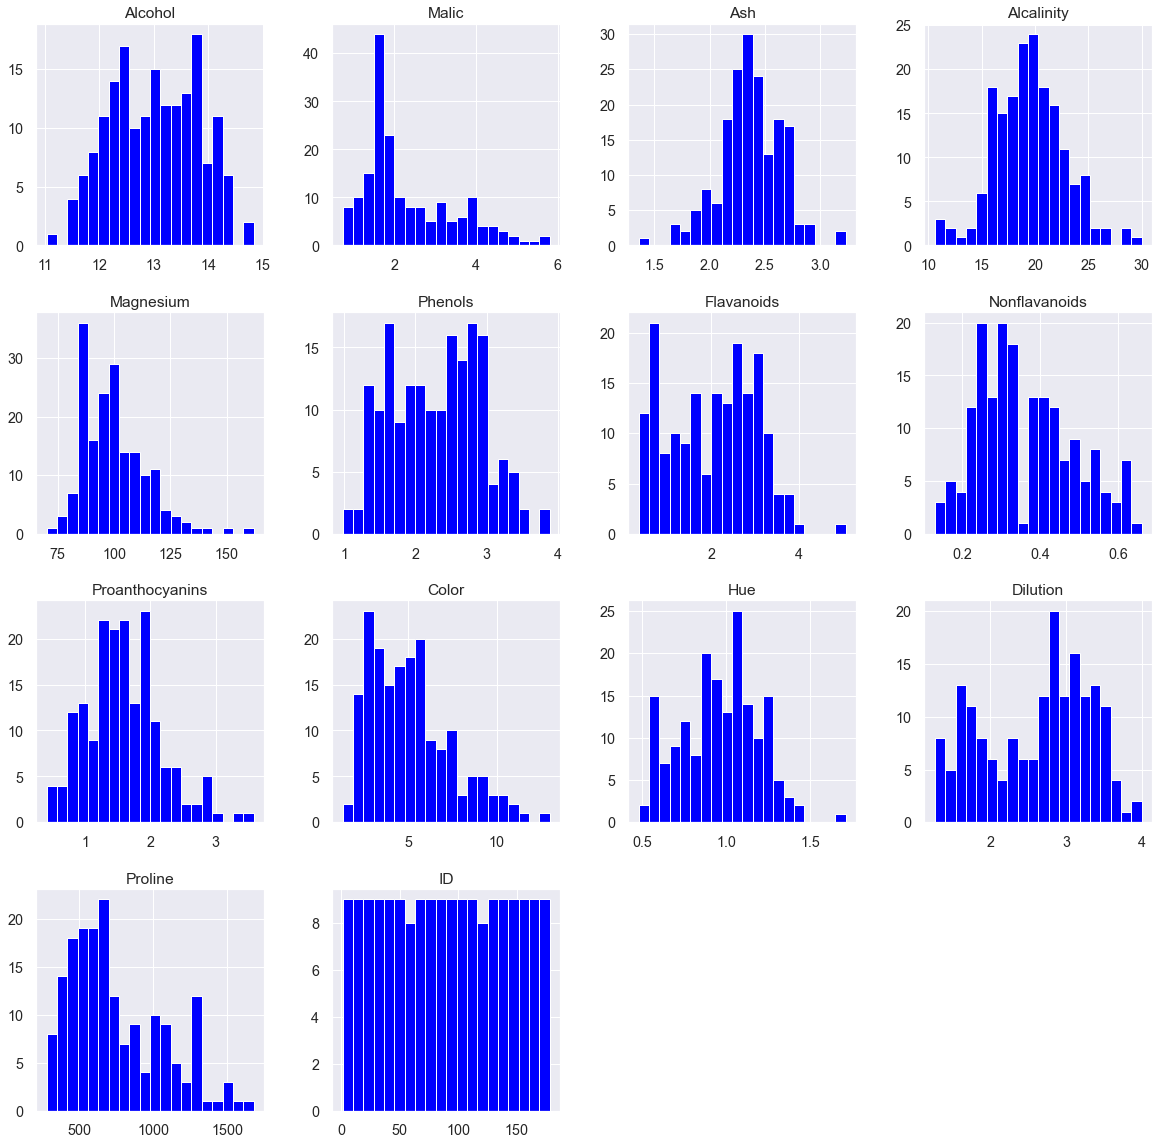

In [37]:
sns.set(style='dark',font_scale=1.3, rc={'figure.figsize':(20,20)})
ax=df.hist(bins=20,color='blue' )

### Outliers Detection

In [38]:
df.columns

Index(['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline', 'ID'],
      dtype='object')

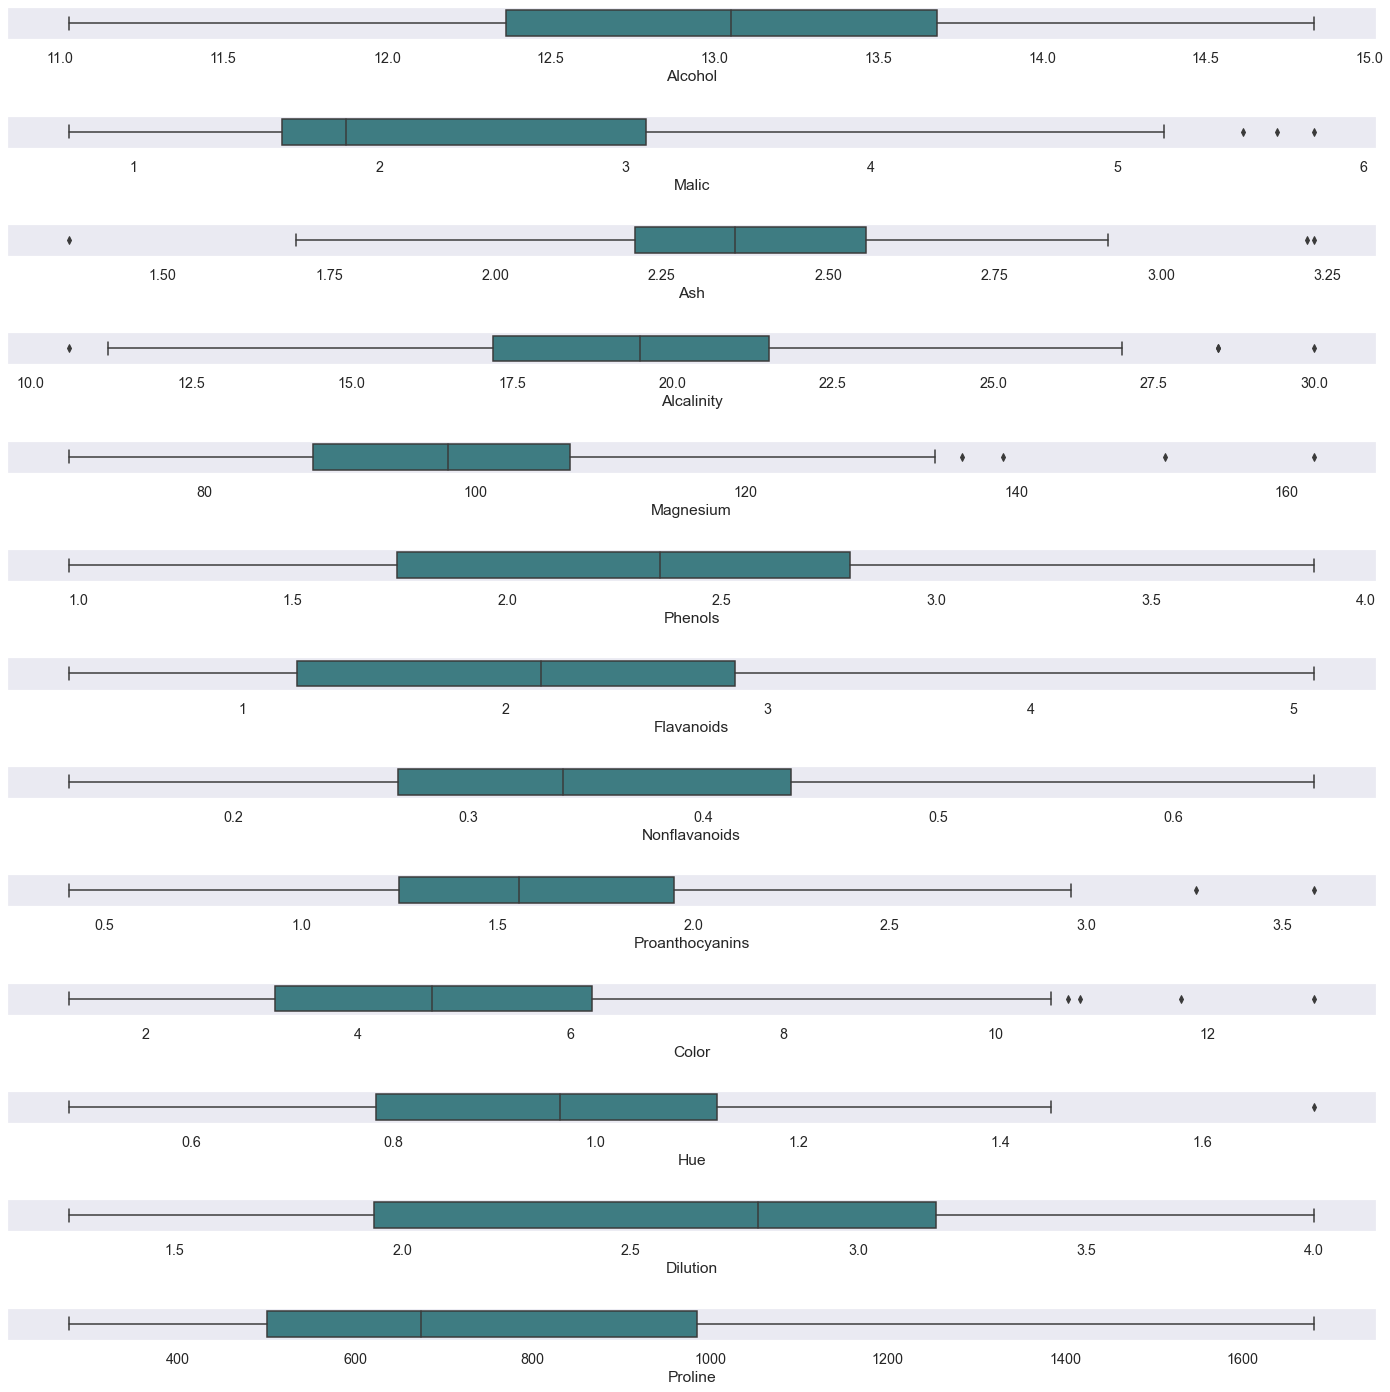

In [43]:
ot=df.copy() 
fig, axes=plt.subplots(13,1,figsize=(20,20),sharex=False,sharey=False)
sns.boxplot(x='Alcohol',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='Malic',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='Ash',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='Alcalinity',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='Magnesium',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='Phenols',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='Flavanoids',data=ot,palette='crest',ax=axes[6])
sns.boxplot(x='Nonflavanoids',data=ot,palette='crest',ax=axes[7])
sns.boxplot(x='Proanthocyanins',data=ot,palette='crest',ax=axes[8])
sns.boxplot(x='Color',data=ot,palette='crest',ax=axes[9])
sns.boxplot(x='Hue',data=ot,palette='crest',ax=axes[10])
sns.boxplot(x='Dilution',data=ot,palette='crest',ax=axes[11])
sns.boxplot(x='Proline',data=ot,palette='crest',ax=axes[12])

plt.tight_layout(pad=2.0)

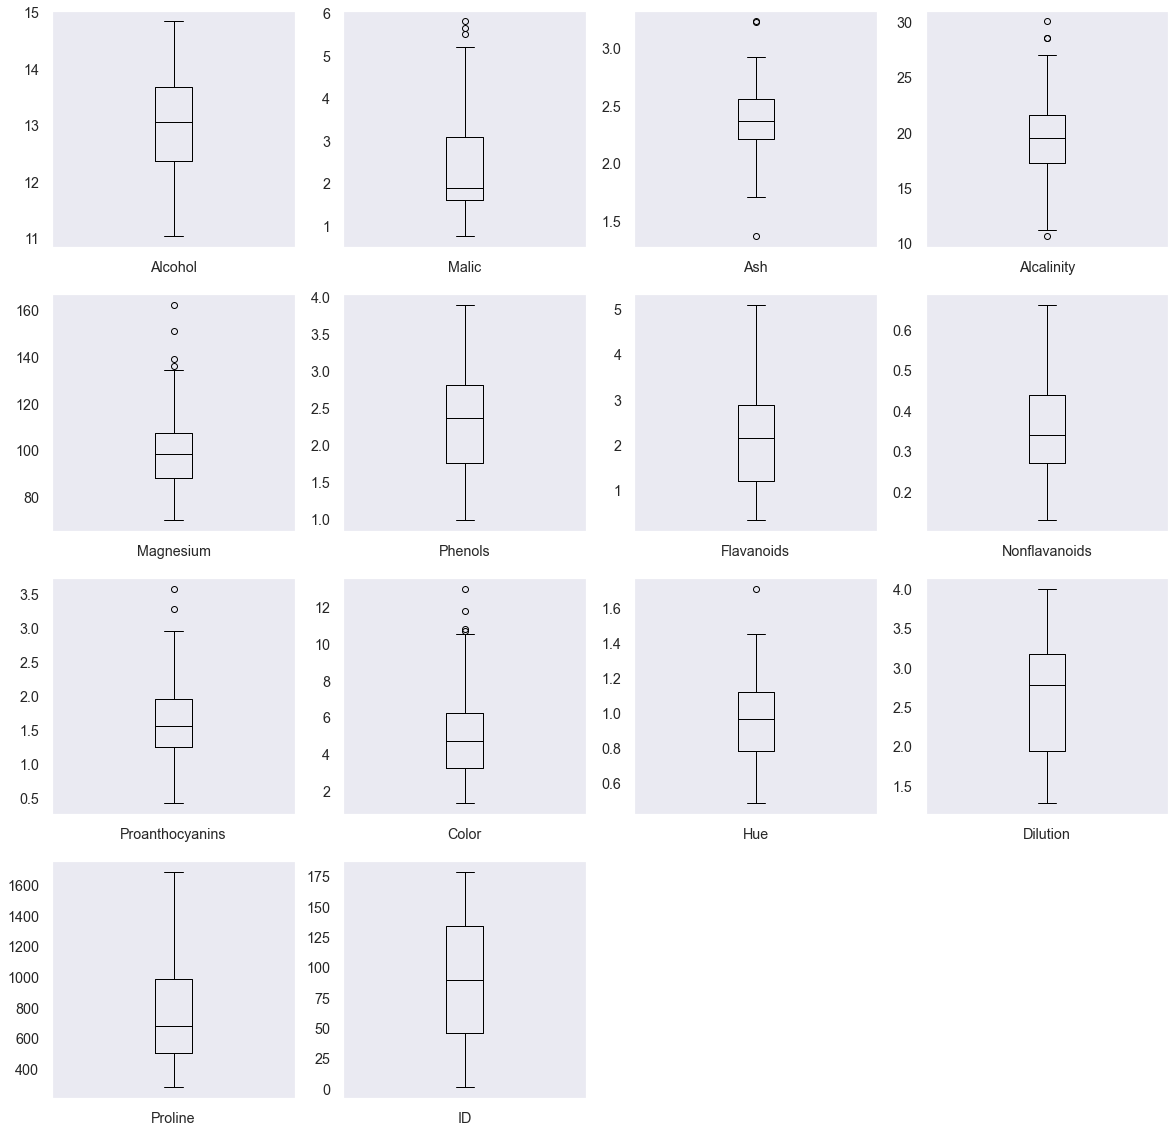

In [44]:
df.plot( kind = 'box', subplots = True, layout = (4,4), sharex = False, sharey = False,color='black')
plt.show()

### Data Visualization

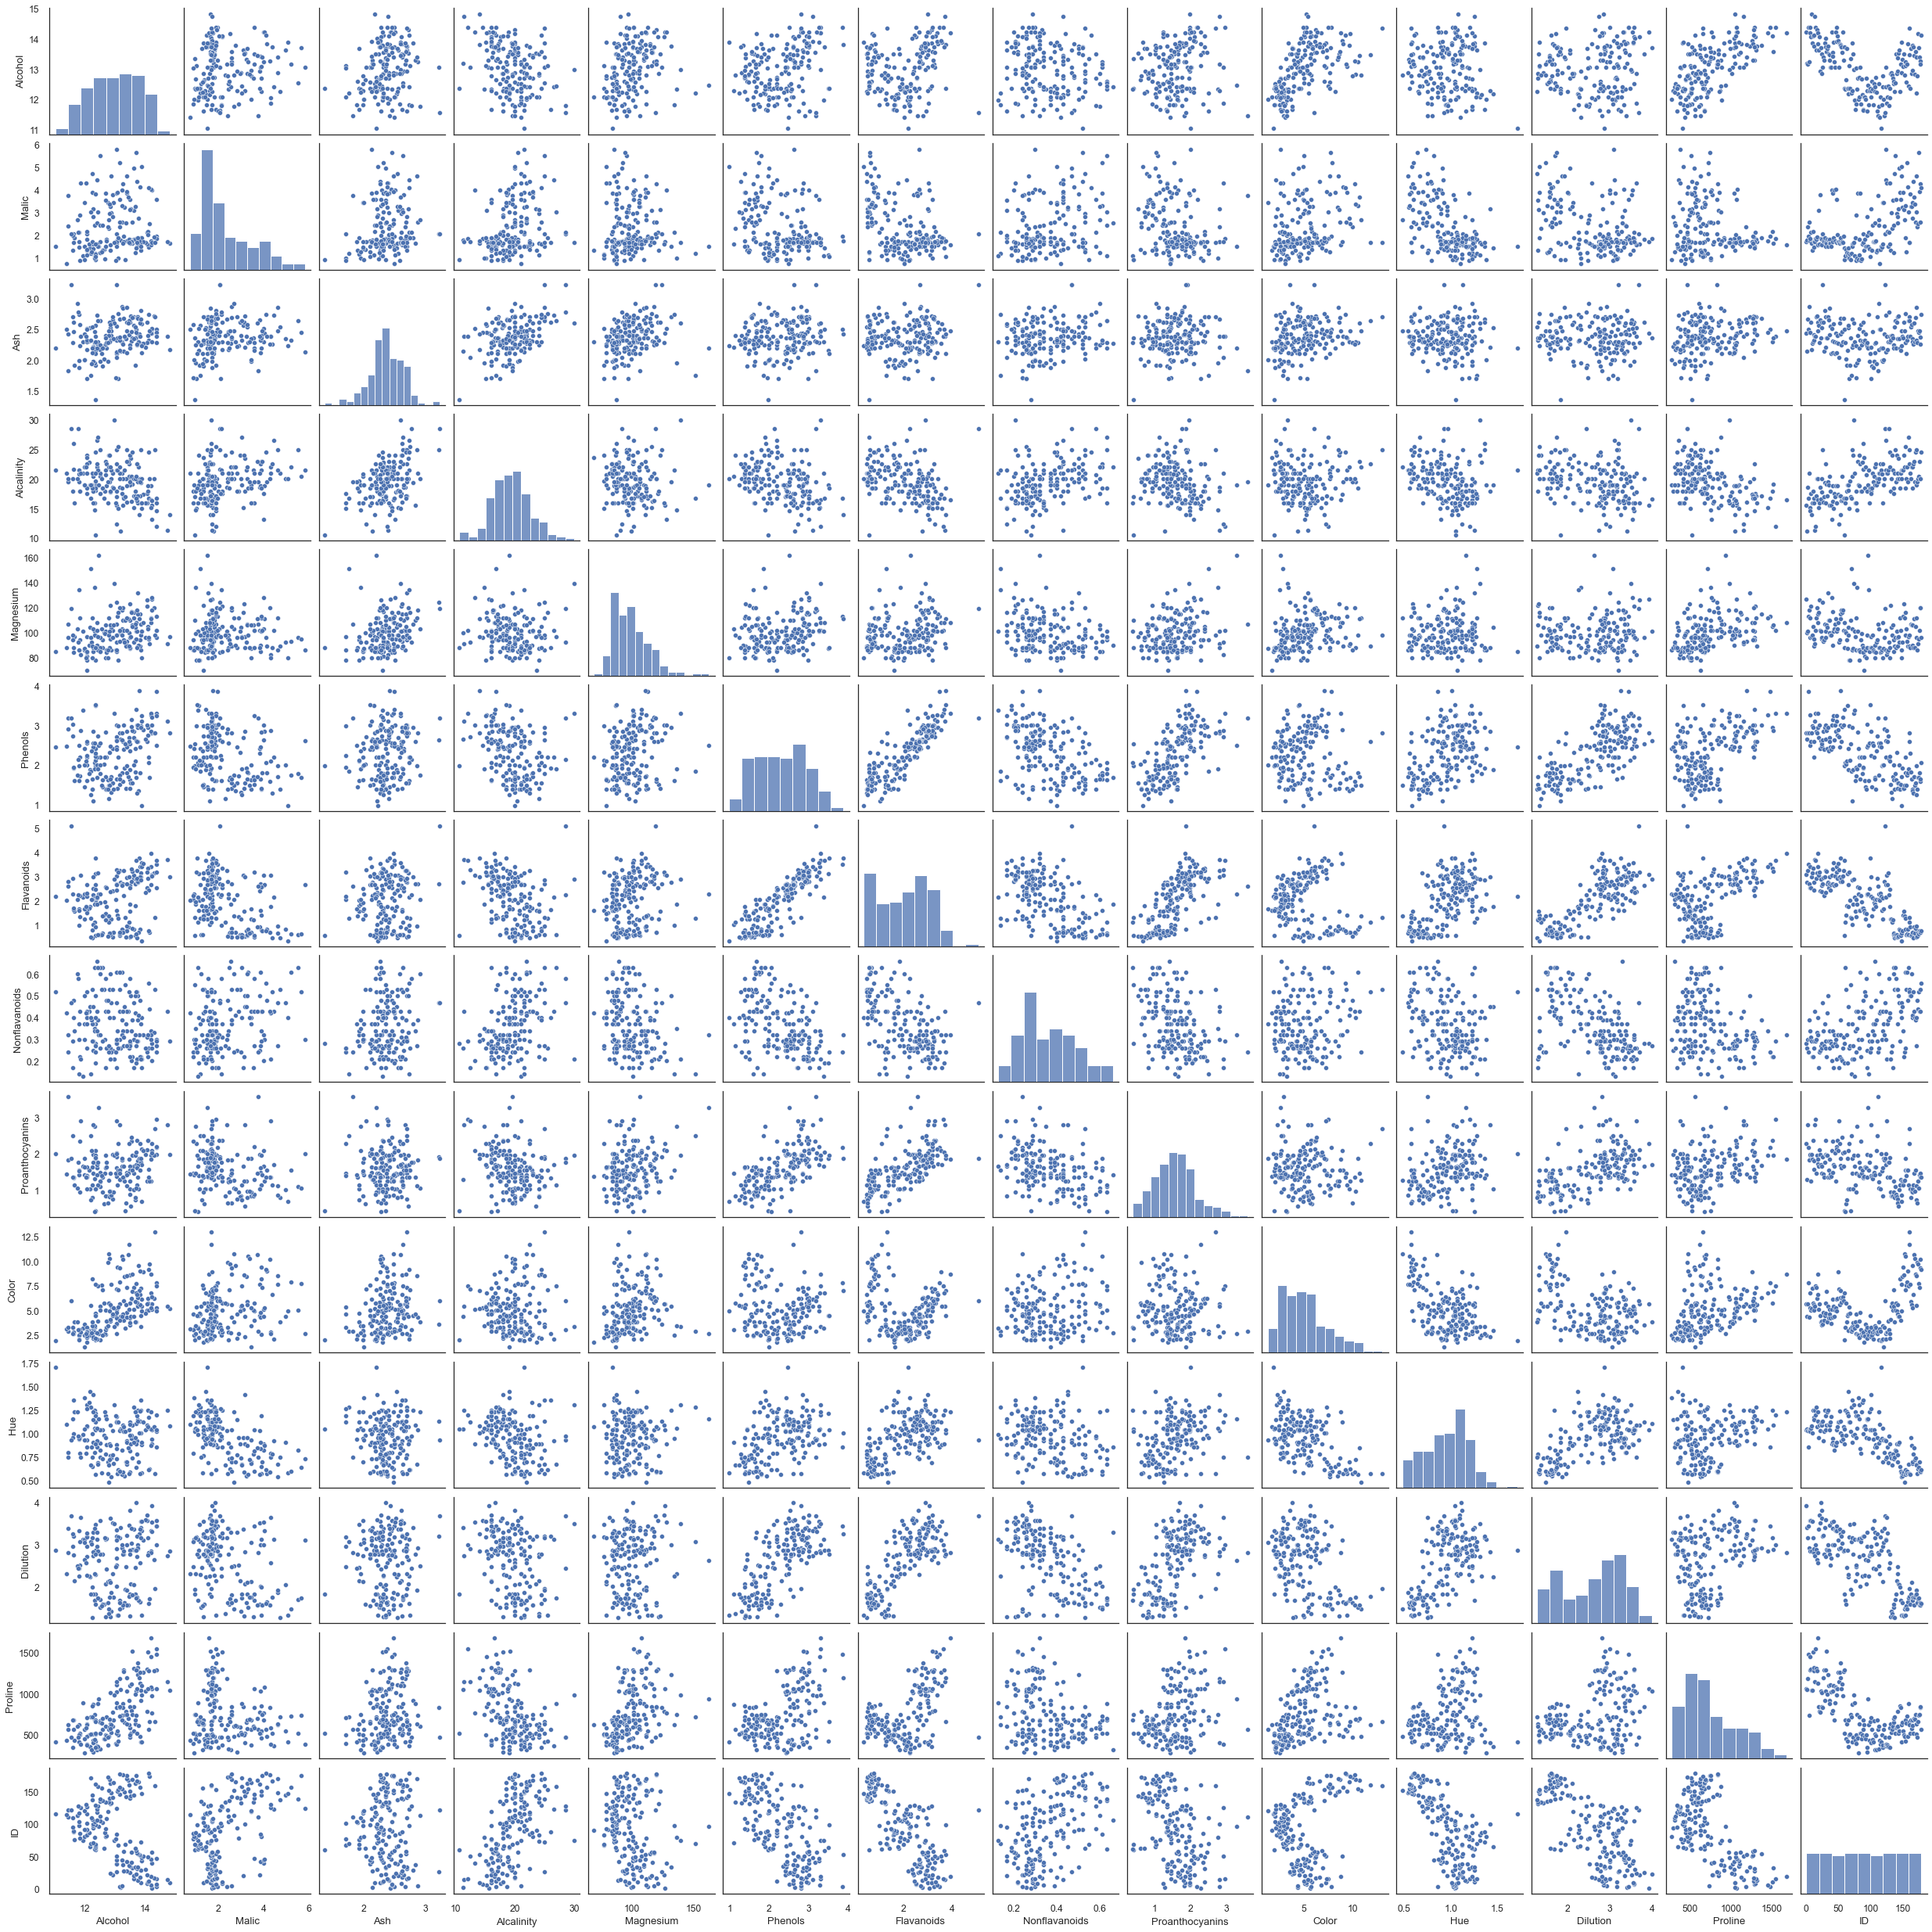

In [48]:
sns.pairplot(df,palette="red")

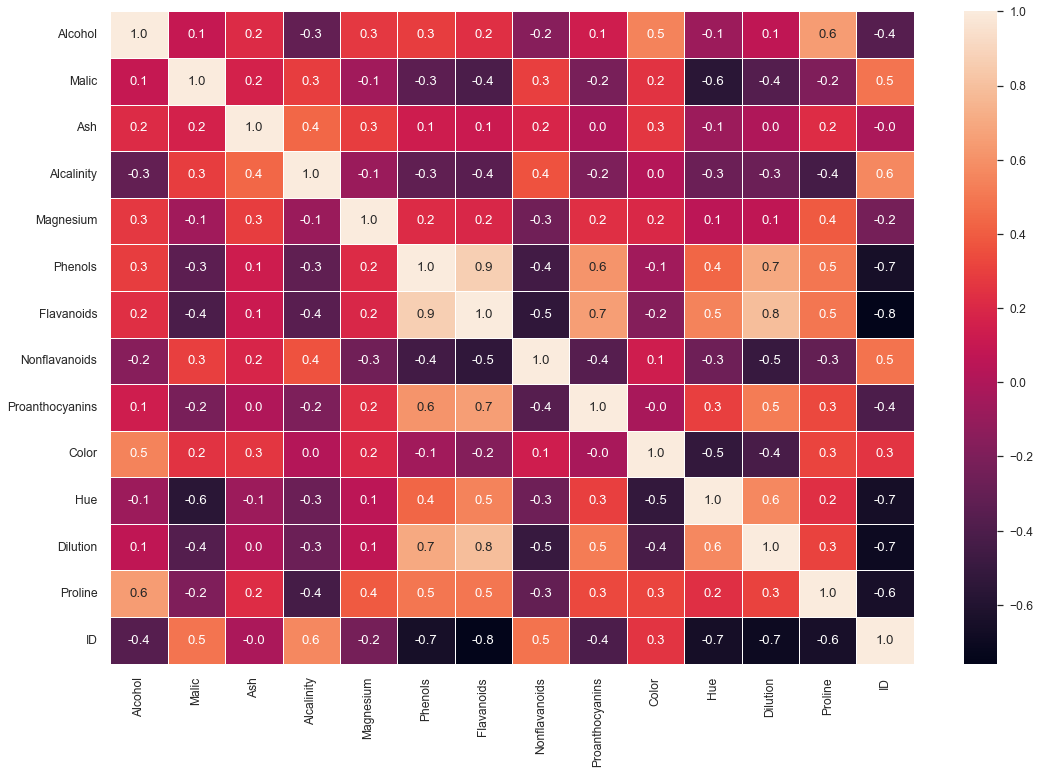

In [49]:
# correlation heatmap

f,ax = plt.subplots(figsize=(18,12))
sns.heatmap(df.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

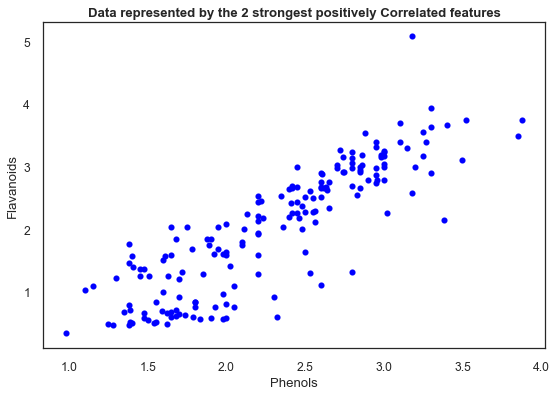

In [50]:
# Plotting frequent flying Phenols vs. Flavanoids  
sns.set(style='white', rc={'figure.figsize':(9,6)},font_scale=1.1)

plt.scatter(x=df['Phenols'], y=df['Flavanoids'], color='blue',lw=0.1)
plt.xlabel('Phenols')
plt.ylabel('Flavanoids')
plt.title('Data represented by the 2 strongest positively Correlated features',fontweight='bold')
plt.show()

### Data Preprocessing

#### Applying Standard Scaler on the Data

In [51]:
standard_scaler = StandardScaler()
std_df = standard_scaler.fit_transform(df)
std_df.shape

(178, 14)

### Applying MinMax Scaler on dataset

In [52]:
# Using Minmaxscaler for accuracy result comparison

from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

minmax_df = minmax.fit_transform(df)
minmax_df.shape

(178, 14)

### PCA

#### PCA on Standard Scaler Dataset

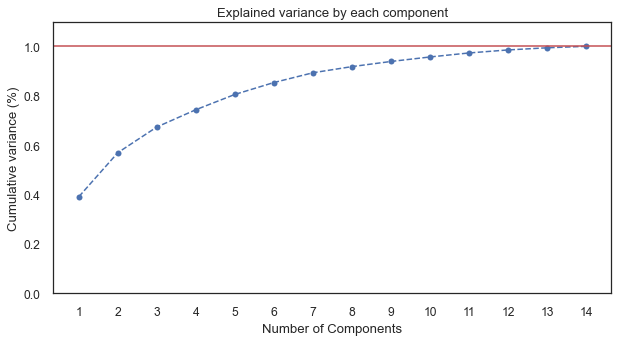

In [56]:
# PCA
pca_var = PCA()
pca_var.fit(std_df)

# Plot
plt.figure(figsize=(10,5))
xi = np.arange(1, 1+std_df.shape[1], step=1)
yi = np.cumsum(pca_var.explained_variance_ratio_)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

# Aesthetics
plt.ylim(0.0,1.1)
plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 1+std_df.shape[1], step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('Explained variance by each component')
plt.axhline(y=1, color='r', linestyle='-')
plt.gca().xaxis.grid(False)

In [57]:
# the amount of variance that each PCA explains is 
var = pca_var.explained_variance_ratio_
var 

array([0.39129819, 0.17835849, 0.10392085, 0.06990396, 0.06183992,
       0.04819035, 0.03948381, 0.02490743, 0.02078919, 0.01822808,
       0.01621756, 0.01222483, 0.00864803, 0.0059893 ])

Text(0.5, 1.0, 'Explained variance by each component')

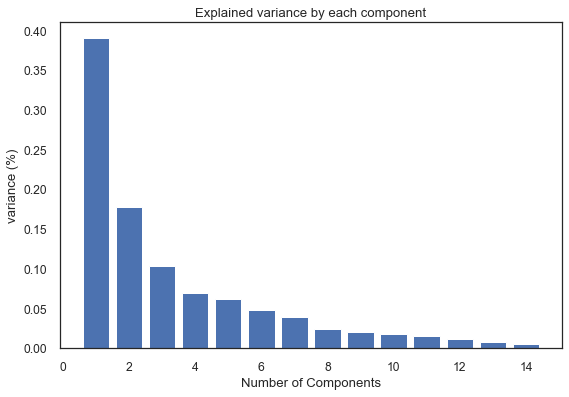

In [59]:
plt.bar(range(1, len(var)+1),var)
plt.xlabel('Number of Components')
plt.ylabel('variance (%)')
plt.title('Explained variance by each component')

In [60]:
# Cumulative Variance
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1


array([39.13, 56.97, 67.36, 74.35, 80.53, 85.35, 89.3 , 91.79, 93.87,
       95.69, 97.31, 98.53, 99.39, 99.99])

In [64]:
# PCA
pca = PCA(n_components=3)
pca_std = pca.fit_transform(std_df)

# Convert to data frame
pca_std_df = pd.DataFrame(data = pca_std, columns = ['PC1', 'PC2','PC3'])

# Shape and preview
print(pca_std_df.shape)
pca_std_df.head()

(178, 3)


PC1       PC2       PC3
0  3.723816 -1.447476 -0.153274
1  2.734987  0.334166 -2.079717
2  2.944840 -1.033583  0.979570
3  4.094144 -2.762344 -0.123541
4  1.550429 -0.867267  1.915570

### PCA plot in 2D

Text(0, 0.5, 'PC2')

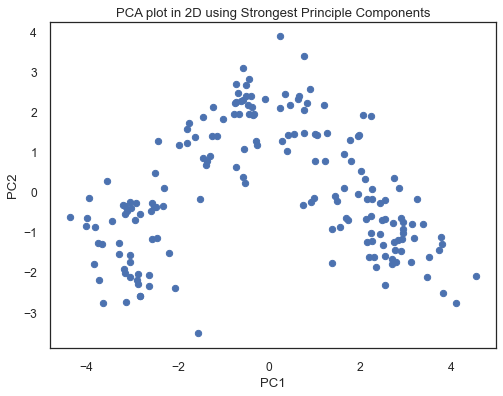

In [65]:
# Figure size
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(pca_std_df.iloc[:,0], pca_std_df.iloc[:,1], s=40)

# Aesthetics
plt.title('PCA plot in 2D using Strongest Principle Components')
plt.xlabel('PC1')
plt.ylabel('PC2')

### PCA on MinMax Scaled Dataset

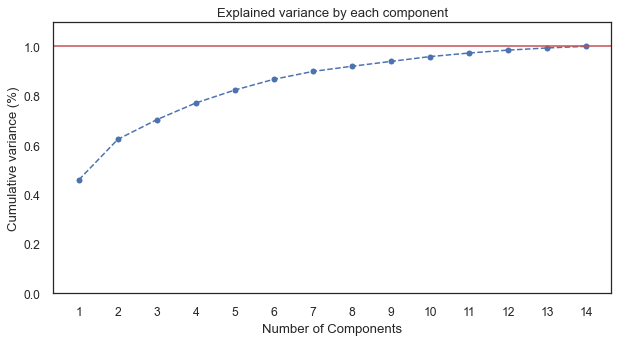

In [66]:
# PCA
pca_var = PCA()
pca_var.fit(minmax_df)

# Plot
plt.figure(figsize=(10,5))
xi = np.arange(1, 1+minmax_df.shape[1], step=1)
yi = np.cumsum(pca_var.explained_variance_ratio_)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

# Aesthetics
plt.ylim(0.0,1.1)
plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 1+minmax_df.shape[1], step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('Explained variance by each component')
plt.axhline(y=1, color='r', linestyle='-')
plt.gca().xaxis.grid(False)

In [67]:
# the amount of variance that each PCA explains is 
var = pca_var.explained_variance_ratio_
var 

array([0.459506  , 0.16420046, 0.07951977, 0.06762289, 0.05235124,
       0.04342315, 0.03180871, 0.02082412, 0.01966956, 0.01951889,
       0.01435926, 0.01185743, 0.0086919 , 0.0066466 ])

Text(0.5, 1.0, 'Explained variance by each component')

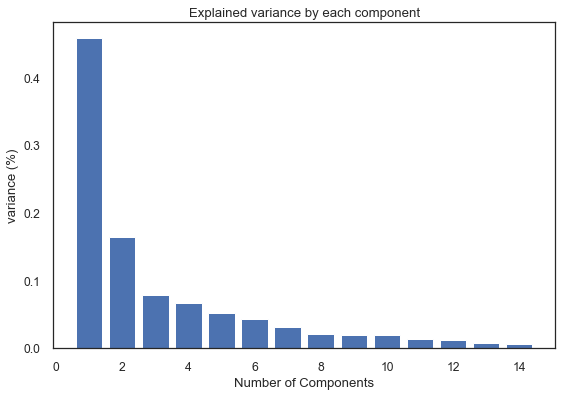

In [68]:
plt.bar(range(1, len(var)+1),var)
plt.xlabel('Number of Components')
plt.ylabel('variance (%)')
plt.title('Explained variance by each component')


In [69]:
# Cumulative Variance
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 45.95,  62.37,  70.32,  77.08,  82.32,  86.66,  89.84,  91.92,
        93.89,  95.84,  97.28,  98.47,  99.34, 100.  ])

In [71]:
# PCA
pca = PCA(n_components=3)
pca_minmax = pca.fit_transform(minmax_df)

# Convert to data frame
pca_minmax_df = pd.DataFrame(data = pca_minmax, columns = ['PC1', 'PC2','PC3'])

# Shape and preview
print(pca_minmax_df.shape)
pca_minmax_df.head()

(178, 3)


PC1       PC2       PC3
0  0.864955 -0.246505  0.012715
1  0.676158 -0.011751 -0.306279
2  0.692172 -0.186686  0.139093
3  0.955057 -0.568299  0.123337
4  0.411640 -0.067685  0.118278

### PCA plot in2D

Text(0, 0.5, 'PC2')

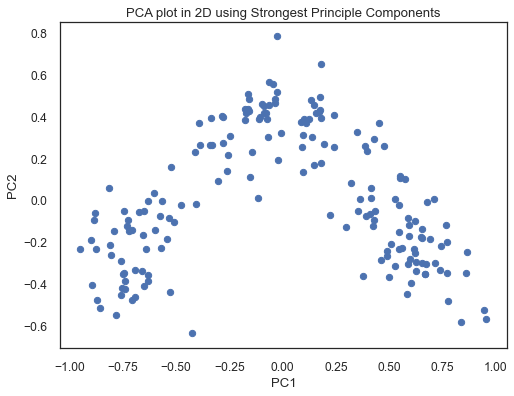

In [72]:
# Figure size
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(pca_minmax_df.iloc[:,0], pca_minmax_df.iloc[:,1], s=40)

# Aesthetics
plt.title('PCA plot in 2D using Strongest Principle Components')
plt.xlabel('PC1')
plt.ylabel('PC2')

### KMeans Clustering

#### Elbow Method for Determining Cluster Amount on PCA Standard Scaled Dataset

In [75]:
inertia = []
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=17)
    kmeans.fit(pca_std_df)
    inertia.append(kmeans.inertia_)

100%|██████████| 8/8 [00:00<00:00, 11.03it/s]


In [77]:
silhouette = {}
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=17)
    kmeans.fit(pca_std_df)
    silhouette[i] = sil(pca_std_df, kmeans.labels_, metric='euclidean')

100%|██████████| 8/8 [00:00<00:00,  9.63it/s]


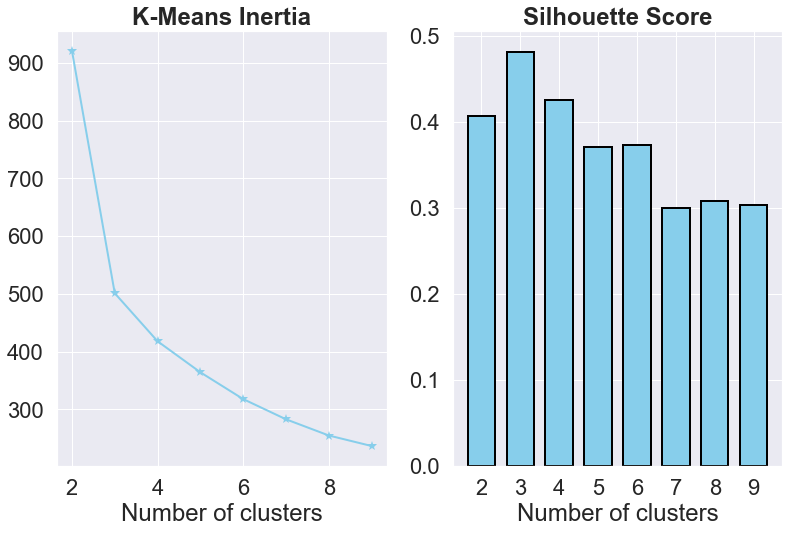

In [79]:
sns.set(style="darkgrid", rc={'figure.figsize':(13,8)}, font_scale=2)

plt.subplot(1,2,1)
plt.plot(range(2,len(inertia)+2), inertia, marker="*", lw=2, color="skyblue", ms=10)
plt.xlabel("Number of clusters")
plt.title("K-Means Inertia", fontweight='bold')

plt.subplot(1,2,2)
plt.bar(range(len(silhouette)), list(silhouette.values()), align='center', width=.7, edgecolor="black", lw=2, color="skyblue" )
plt.xticks(range(len(silhouette)), list(silhouette.keys()))
plt.xlabel("Number of clusters")
plt.title("Silhouette Score", fontweight='bold')

plt.show()

### Silhouette Score

In [81]:
from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(pca_std_df)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(pca_std_df, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method

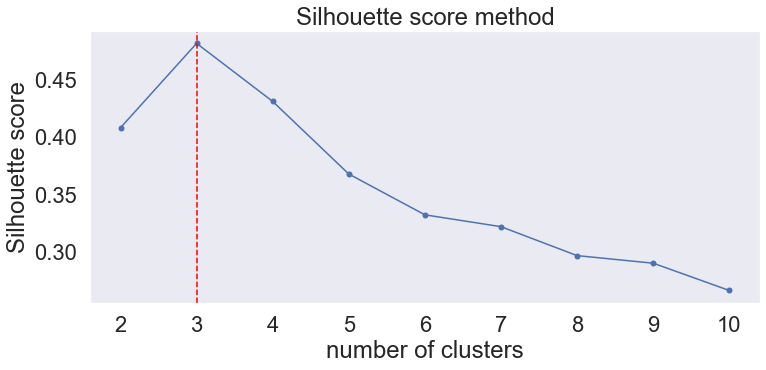

In [83]:
fig, ax = plt.subplots(figsize=(12,5))
plt.plot(n_clusters, s_scores, marker='o')
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(3, ls="--", c="red")
plt.grid()
plt.show()

Elbow Plot for Standard Scaler data


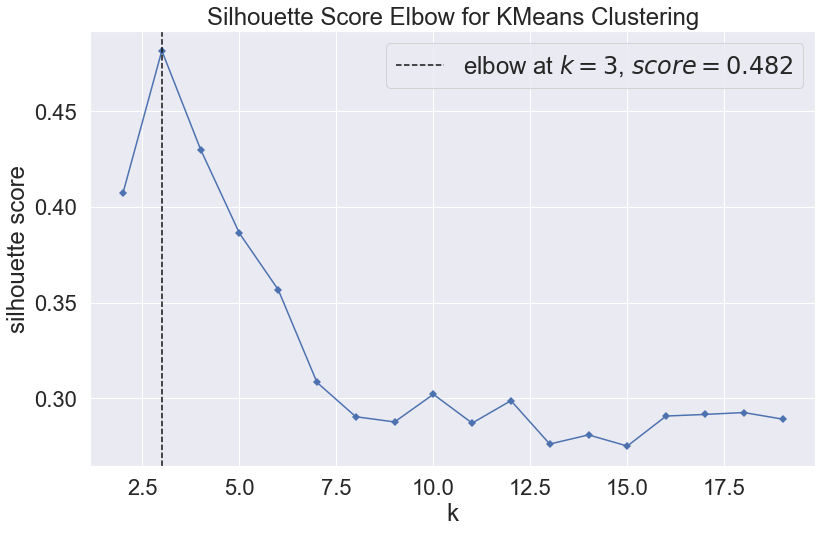

In [84]:
# 1. How many number of clusters? n_clusters?

# Since true labels are not known..we will use Silhouette Coefficient (Clustering performance evaluation)
# knee Elbow graph method


# Instantiate a scikit-learn K-Means model. we will check for two diff hyperparameters value effect.
model = KMeans(random_state=10, max_iter=500, init='k-means++')

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette', timings=False)
# Fit the data and visualize
print('Elbow Plot for Standard Scaler data')
visualizer.fit(pca_std_df)    
visualizer.show()
plt.show()

In [87]:
# With the elbow method, the ideal number of clusters to use was 6.
# We will also use the Silhouette score to determine an optimal number.

clust_list = [2,3,4,5,6,7,8,9]

#  Silhouette score for stadardScaler applied on data.

for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(pca_std_df)
    sil_score1= sil(pca_std_df, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.40748327911081017
For n_clusters = 3 The average silhouette_score is : 0.4817835370724269
For n_clusters = 4 The average silhouette_score is : 0.4310924081843297
For n_clusters = 5 The average silhouette_score is : 0.41489679453806727
For n_clusters = 6 The average silhouette_score is : 0.38372271476753916
For n_clusters = 7 The average silhouette_score is : 0.30996557235673206
For n_clusters = 8 The average silhouette_score is : 0.2886299672842358
For n_clusters = 9 The average silhouette_score is : 0.29573468459768776


For n_clusters = 2 The average silhouette_score is : 0.40748327911081017
For n_clusters = 3 The average silhouette_score is : 0.4817835370724269
For n_clusters = 4 The average silhouette_score is : 0.4310924081843297
For n_clusters = 5 The average silhouette_score is : 0.41489679453806727
For n_clusters = 6 The average silhouette_score is : 0.38372271476753916
For n_clusters = 7 The average silhouette_score is : 0.30996557235673206
For n_clusters = 8 The average silhouette_score is : 0.2886299672842358
For n_clusters = 9 The average silhouette_score is : 0.29573468459768776


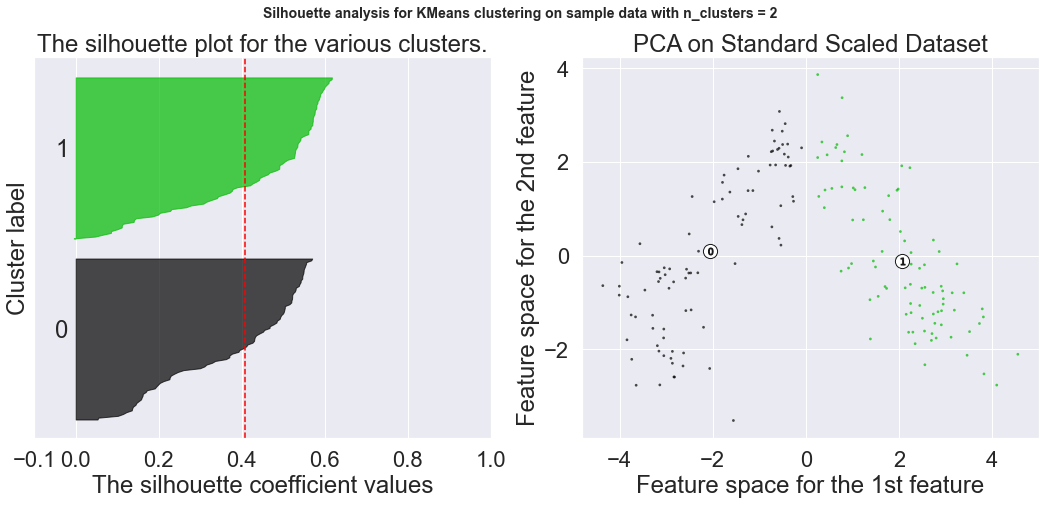

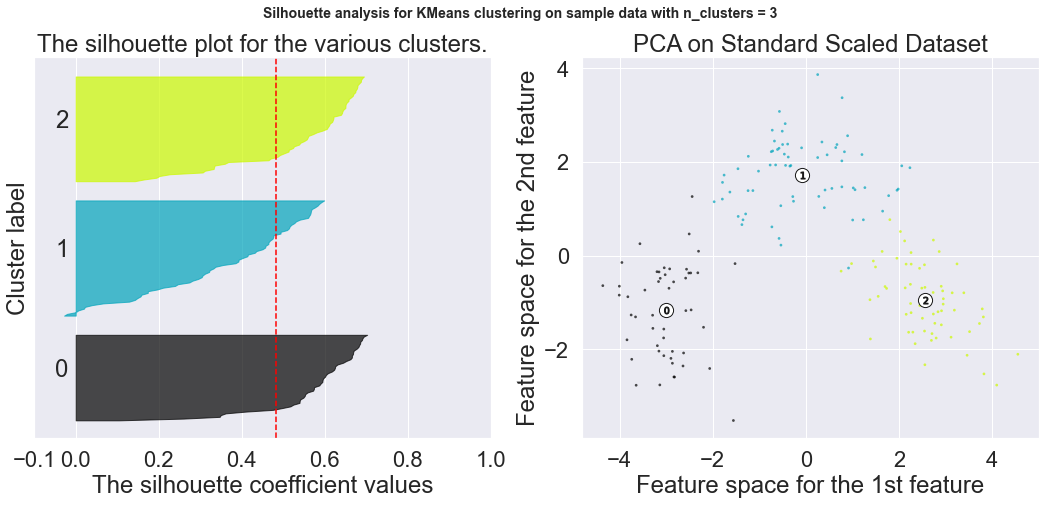

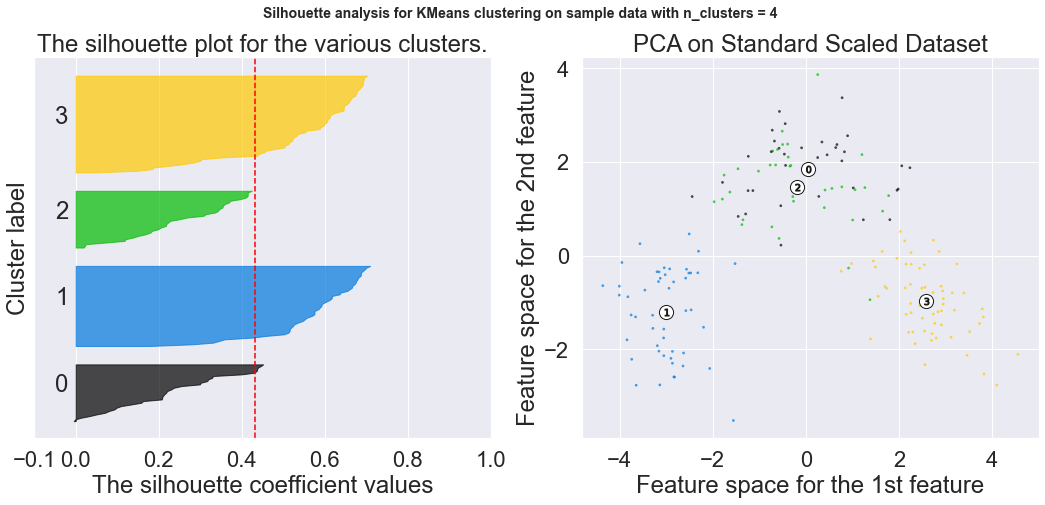

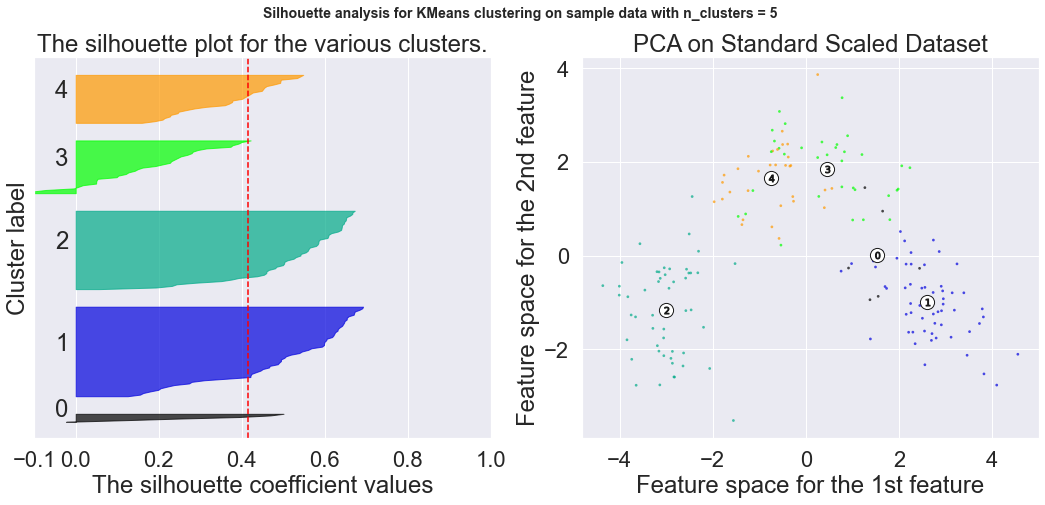

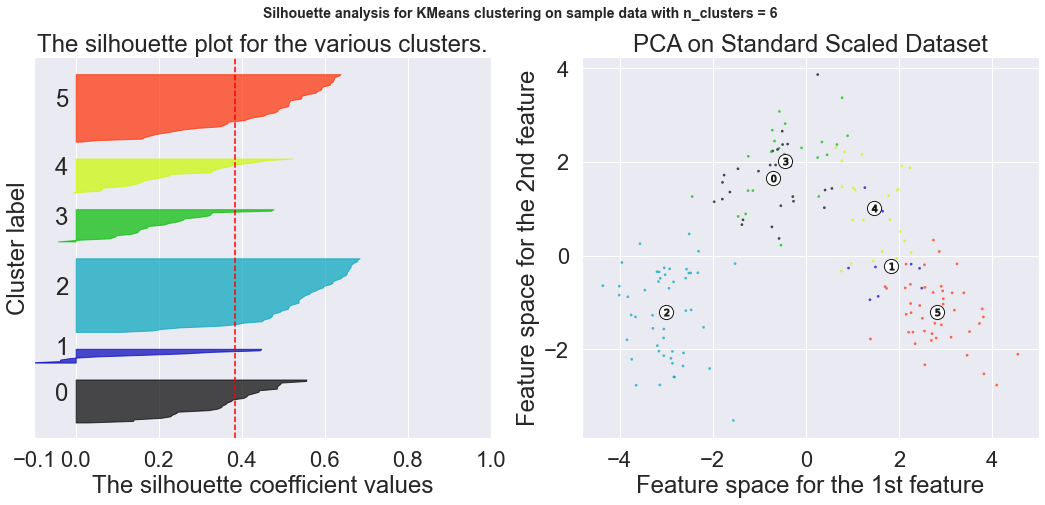

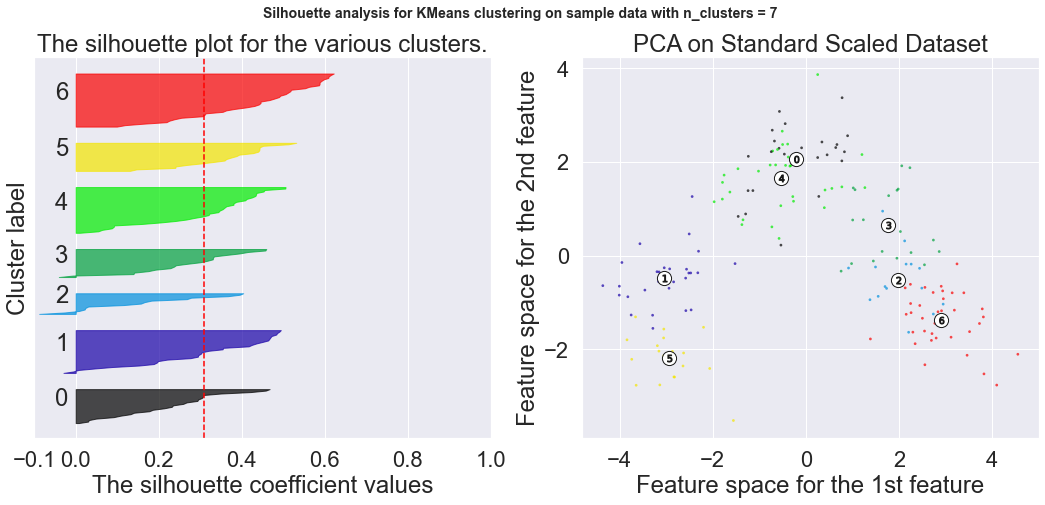

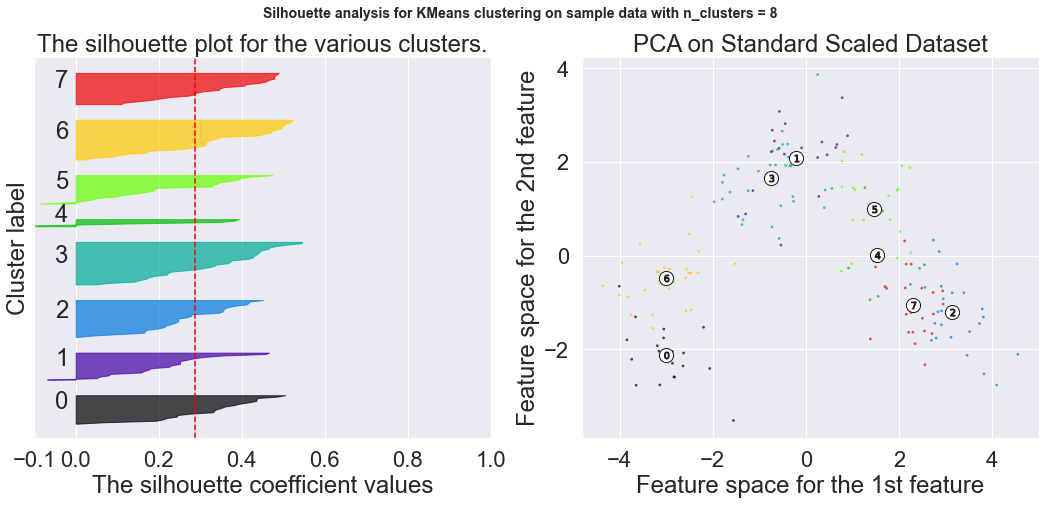

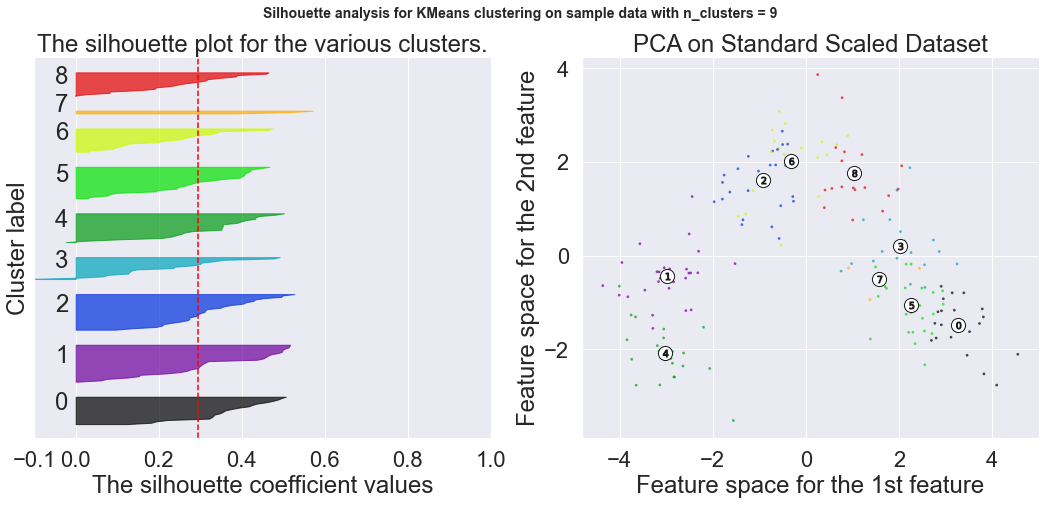

In [95]:
range_n_clusters = [2,3,4,5,6,7,8,9]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(pca_std_df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(pca_std_df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = sil(pca_std_df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(pca_std_df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(pca_std_df.iloc[:,0], pca_std_df.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:,0], centers[:,1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("PCA on Standard Scaled Dataset")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

### Build KMeans Cluster algorithm using K=3 and PCA on Standard Scaler Applied Dataset

In [96]:
# we have found good number of cluster = 3
# model building using cluster numbers = 3

model_kmeans = KMeans(n_clusters=3, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(pca_std_df)
y_predict_kmeans.shape

(178,)

In [97]:
# these are nothing but cluster labels...

y_predict_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [98]:
model_kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [99]:
# cluster centres associated with each lables

model_kmeans.cluster_centers_

array([[-3.00022931, -1.16059366, -0.23271123],
       [-0.08562687,  1.72743604,  0.24903744],
       [ 2.55325354, -0.9460415 , -0.08278602]])

In [100]:
# within-cluster sum of squared

# The lower values of inertia are better and zero is optimal.
# Inertia is the sum of squared error for each cluster. 
# Therefore the smaller the inertia the denser the cluster(closer together all the points are)

model_kmeans.inertia_

501.17482400537693

In [101]:
#Assign clusters to the data set
data['Kmeans_label'] = model_kmeans.labels_

In [104]:
# Group data by Clusters (K=6)
data.groupby('Kmeans_label').agg(['mean'])

Type    Alcohol     Malic       Ash Alcalinity   Magnesium  \
                  mean       mean      mean      mean       mean        mean   
Kmeans_label                                                                   
0             2.960000  13.144000  3.346200  2.425600  21.330000  98.640000    
1             2.000000  12.246418  1.891642  2.242985  20.140299  93.238806    
2             1.032787  13.711475  1.997049  2.453770  17.281967  107.786885   

               Phenols Flavanoids Nonflavanoids Proanthocyanins     Color  \
                  mean       mean          mean            mean      mean   
Kmeans_label                                                                
0             1.677200  0.807000   0.45040       1.156400        7.264400   
1             2.258209  2.085672   0.36194       1.612836        3.059701   
2             2.842131  2.969180   0.28918       1.922951        5.444590   

                   Hue  Dilution      Proline          ID  
                  mean      mean         mean        mean  
Kmeans_label                                               
0             0.686200  1.698800  622.440000   152.380000  
1             1.059493  2.798507  508.597015   95.104478   
2             1.067705  3.154754  1110.639344  31.803279

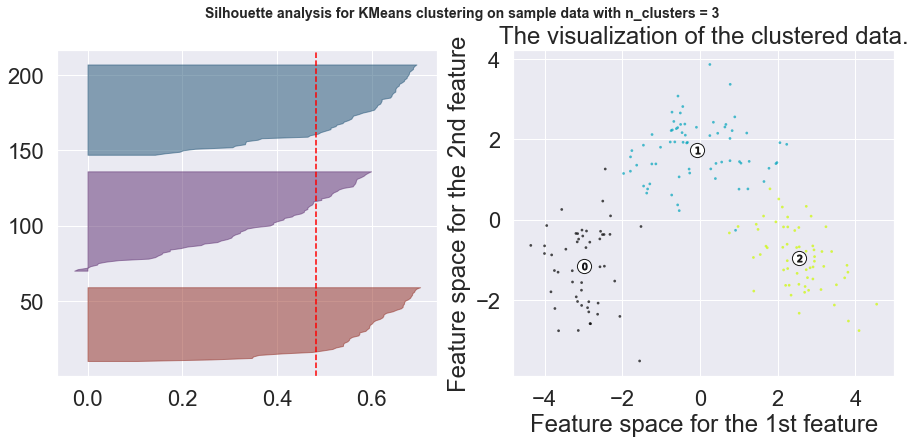

In [108]:
from yellowbrick.cluster import SilhouetteVisualizer

fig,(ax1,ax2) = plt.subplots(1,2,sharey=False)
fig.set_size_inches(15,6)



sil_visualizer1 = SilhouetteVisualizer(model_kmeans,ax= ax1, colors=['#922B21','#5B2C6F','#1B4F72'])
sil_visualizer1.fit(pca_std_df)


# 2nd Plot showing the actual clusters formed

import matplotlib.cm as cm
colors1 = cm.nipy_spectral(model_kmeans.labels_.astype(float) / 3) # 3 is number of clusters
ax2.scatter(pca_std_df.iloc[:, 0], pca_std_df.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors1, edgecolor='k')

# Labeling the clusters
centers1 = model_kmeans.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers1[:, 0], centers1[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers1):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')


ax2.set_title(label ="The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % 3),fontsize=14, fontweight='bold')

#sil_visualizer1.show()
plt.show()

### Elbow Method and Silhouette Score on PCA MinMaxScaler Applied Data

In [109]:
inertia = []
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=17)
    kmeans.fit(pca_minmax_df)
    inertia.append(kmeans.inertia_)

100%|██████████| 8/8 [00:00<00:00, 11.25it/s]


In [110]:
silhouette = {}
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=17)
    kmeans.fit(pca_minmax_df)
    silhouette[i] = sil(pca_minmax_df, kmeans.labels_, metric='euclidean')

100%|██████████| 8/8 [00:00<00:00, 11.23it/s]


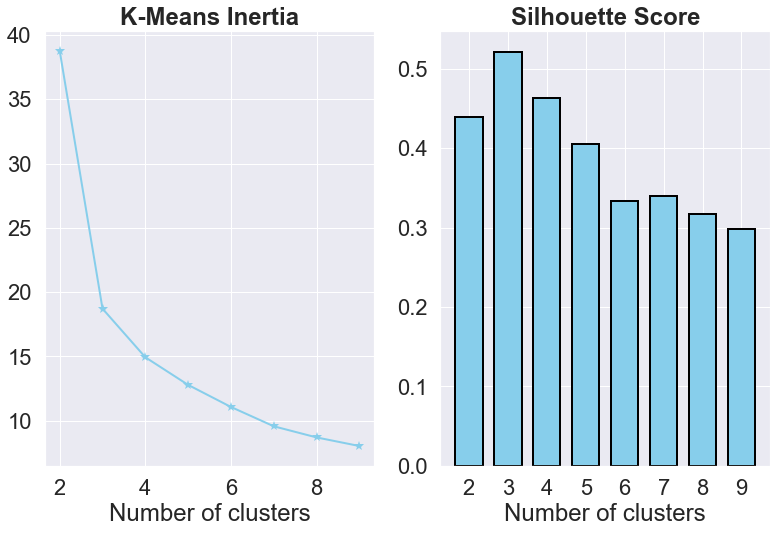

In [112]:
sns.set(style="darkgrid", rc={'figure.figsize':(13,8)}, font_scale=2)

plt.subplot(1,2,1)
plt.plot(range(2,len(inertia)+2), inertia, marker="*", lw=2, color="skyblue", ms=10)
plt.xlabel("Number of clusters")
plt.title("K-Means Inertia", fontweight='bold')

plt.subplot(1,2,2)
plt.bar(range(len(silhouette)), list(silhouette.values()), align='center', width=.7, edgecolor="black", lw=2, color="skyblue" )
plt.xticks(range(len(silhouette)), list(silhouette.keys()))
plt.xlabel("Number of clusters")
plt.title("Silhouette Score", fontweight='bold')

plt.show()

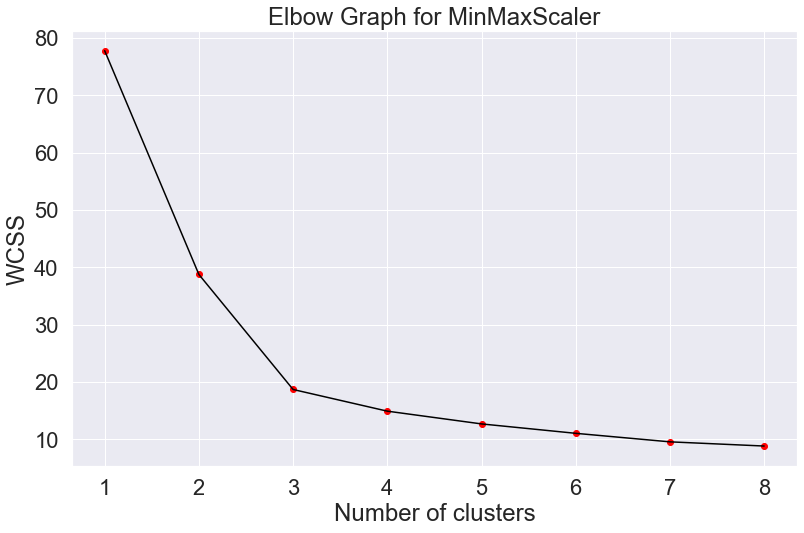

In [114]:
wcss=[]
for i in range (1,9):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(pca_minmax_df)
    wcss.append(kmeans.inertia_)
    
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,9),wcss,color = 'black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph for MinMaxScaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

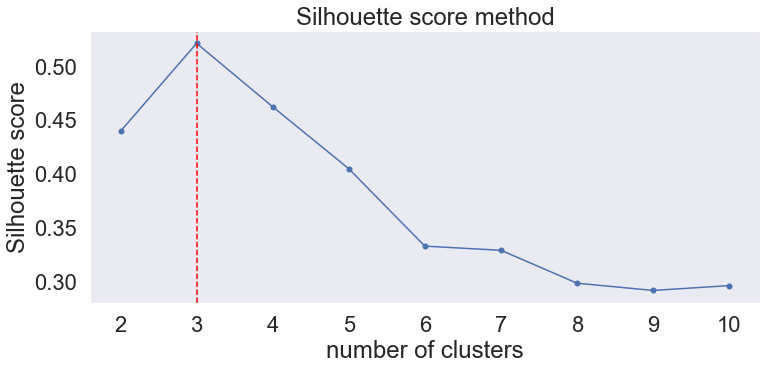

In [116]:
from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(pca_minmax_df)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(pca_minmax_df, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method

fig, ax = plt.subplots(figsize=(12,5))
plt.plot(n_clusters, s_scores, marker='o')
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(3, ls="--", c="red")
plt.grid()
plt.show()

Elbow Plot for MinMaxScaler data


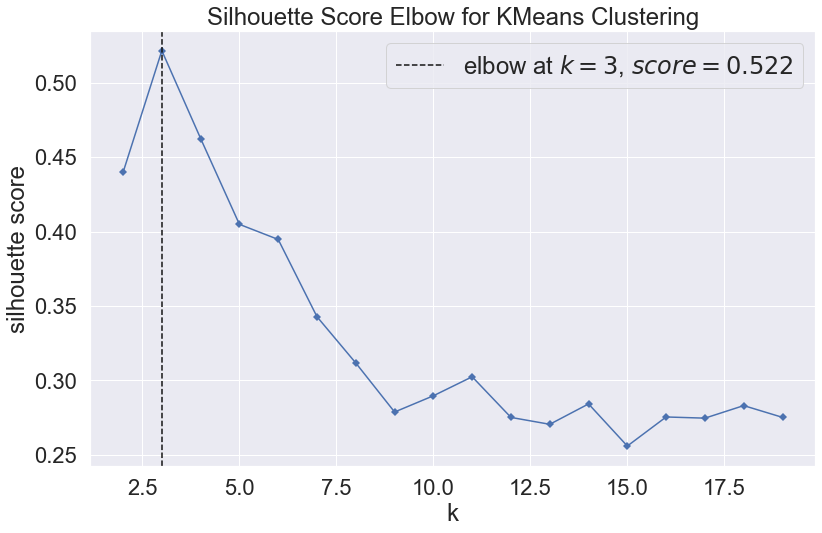

In [120]:
# Instantiate a scikit-learn K-Means model. we will check for two diff hyperparameters value effect.
model = KMeans(random_state=10, max_iter=500, init='k-means++')

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette', timings=False)
# Fit the data and visualize
print('Elbow Plot for MinMaxScaler data')
visualizer.fit(pca_minmax_df)    
visualizer.show()
plt.show()

In [121]:
# With the elbow method, the ideal number of clusters to use was 6.
# We will also use the Silhouette score to determine an optimal number.

clust_list = [2,3,4,5,6,7,8,9]

#  Silhouette score for MinMaxScaler Applied on data .

for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(pca_minmax_df)
    sil_score1= sil(pca_minmax_df, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.43975041589138875
For n_clusters = 3 The average silhouette_score is : 0.5215335527289148
For n_clusters = 4 The average silhouette_score is : 0.4625268425813935
For n_clusters = 5 The average silhouette_score is : 0.3982593665485297
For n_clusters = 6 The average silhouette_score is : 0.3947108989572142
For n_clusters = 7 The average silhouette_score is : 0.3289857388561523
For n_clusters = 8 The average silhouette_score is : 0.31172322269137387
For n_clusters = 9 The average silhouette_score is : 0.2997463078410953


For n_clusters = 2 The average silhouette_score is : 0.43975041589138875
For n_clusters = 3 The average silhouette_score is : 0.5215335527289148
For n_clusters = 4 The average silhouette_score is : 0.4625268425813935
For n_clusters = 5 The average silhouette_score is : 0.40486336459064215
For n_clusters = 6 The average silhouette_score is : 0.3947108989572142
For n_clusters = 7 The average silhouette_score is : 0.3427923839600768
For n_clusters = 8 The average silhouette_score is : 0.31172322269137387
For n_clusters = 9 The average silhouette_score is : 0.2787828910972608


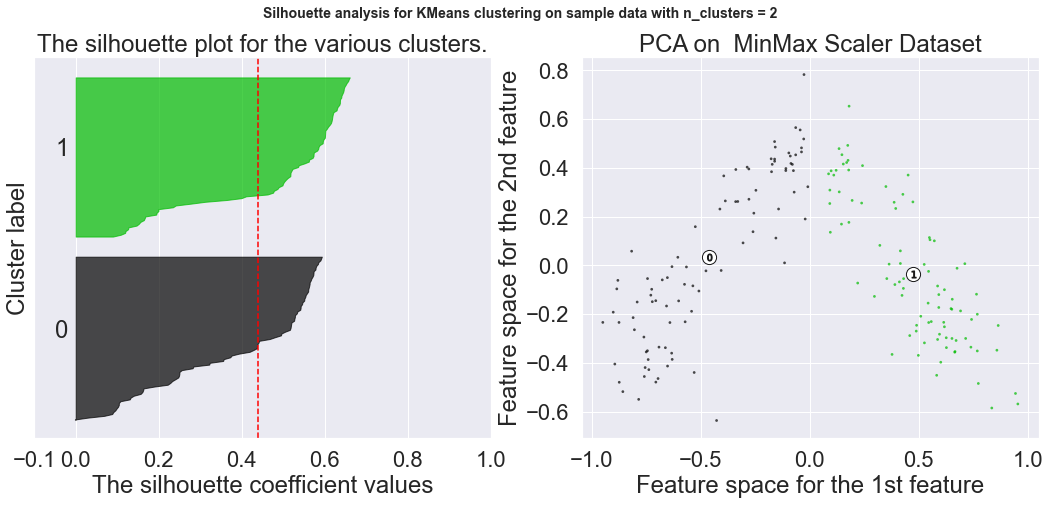

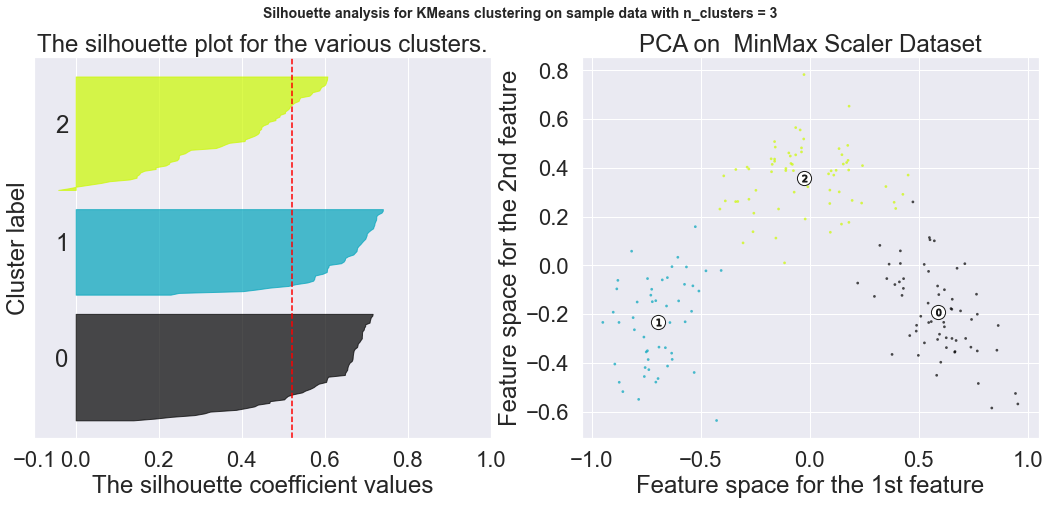

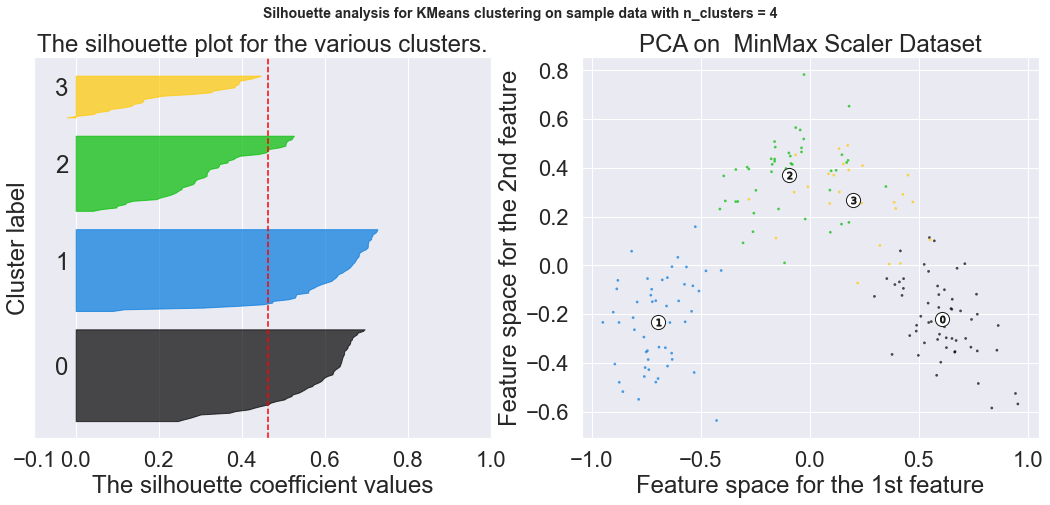

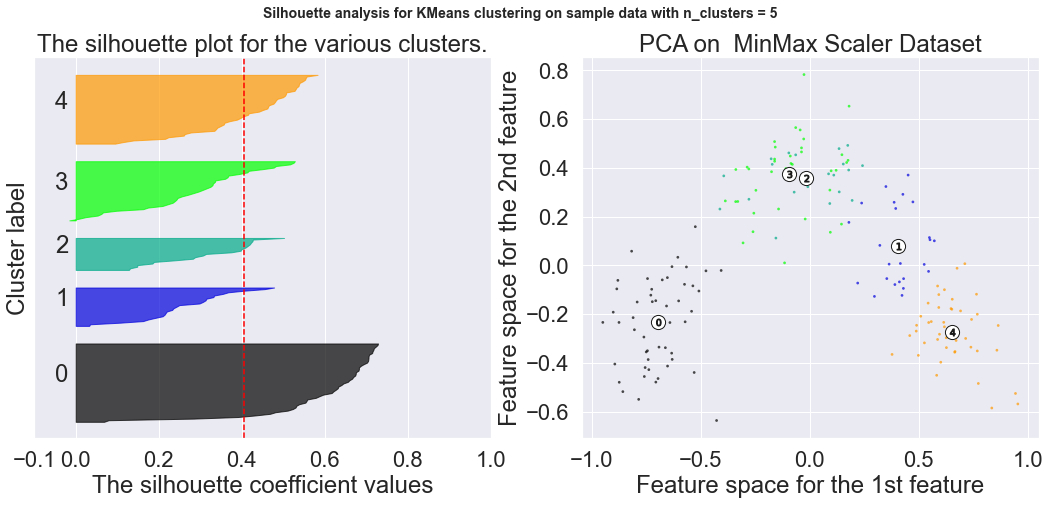

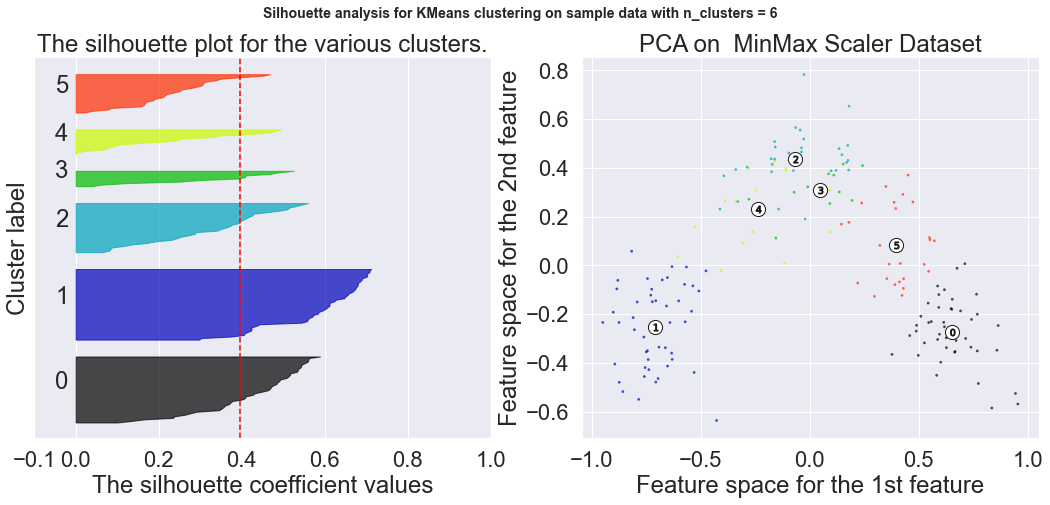

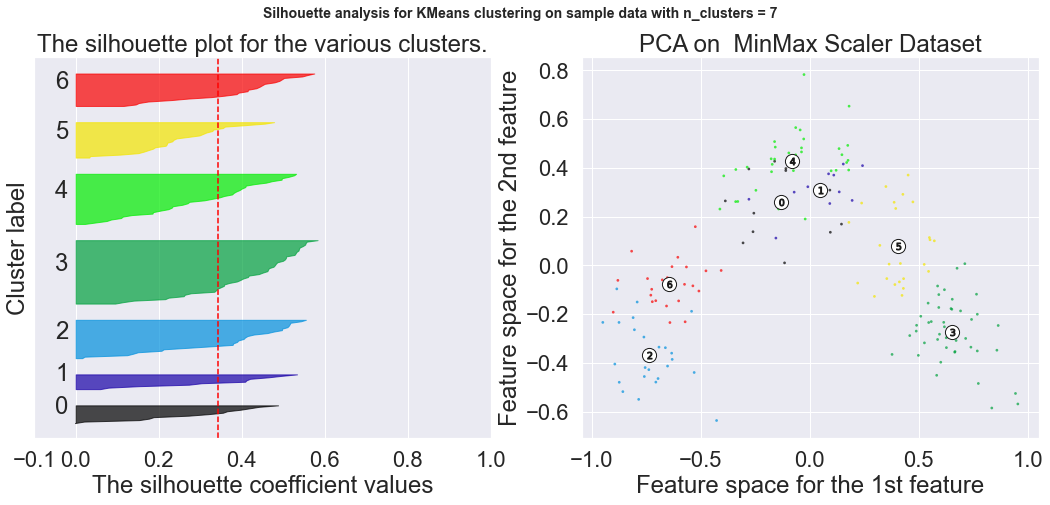

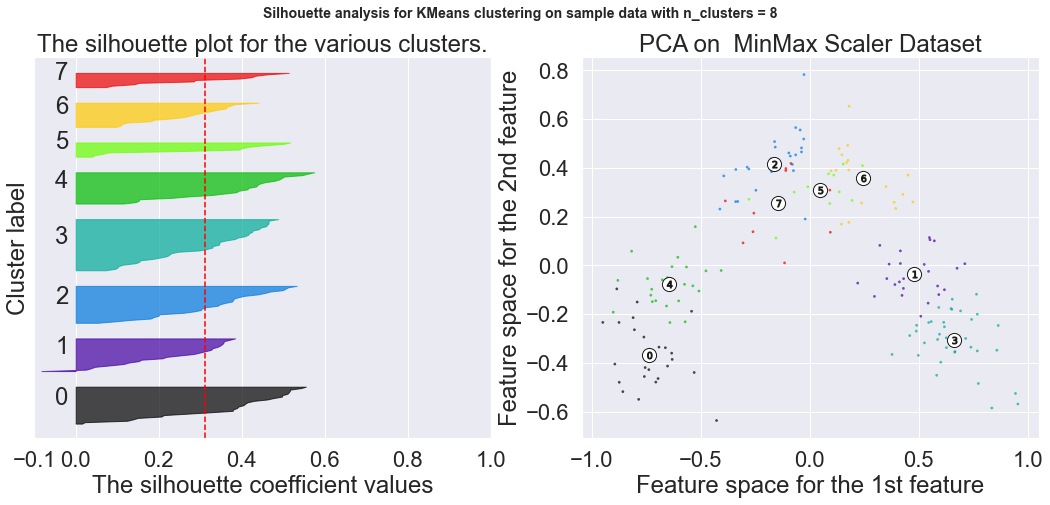

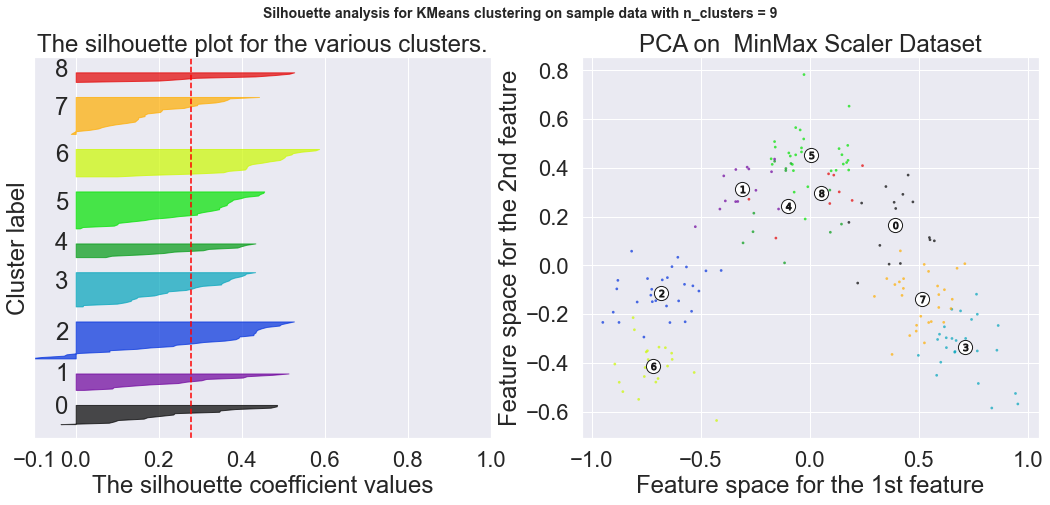

In [125]:
range_n_clusters = [2,3,4,5,6,7,8,9]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(pca_minmax_df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(pca_minmax_df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = sil(pca_minmax_df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(pca_minmax_df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(pca_minmax_df.iloc[:,0], pca_minmax_df.iloc[:,1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:,0], centers[:,1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("PCA on  MinMax Scaler Dataset")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


### Build KMeans Cluster algorithm using K=3 and PCA on MinMaxScaler Applied Dataset

In [123]:
# we have found good number of cluster = 3
# model building using cluster numbers = 3

model_kmeans = KMeans(n_clusters=3, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(pca_minmax_df)
y_predict_kmeans.shape

(178,)

In [124]:
# these are nothing but cluster labels...

y_predict_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [126]:
model_kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [127]:
# cluster centres associated with each lables

model_kmeans.cluster_centers_

array([[-0.69579292, -0.23298991,  0.00190367],
       [-0.02383121,  0.35770859,  0.01239953],
       [ 0.58649203, -0.19289148, -0.01473472]])

In [130]:
# within-cluster sum of squared

# The lower values of inertia are better and zero is optimal.
# Inertia is the sum of squared error for each cluster. 
# Therefore the smaller the inertia the denser the cluster(closer together all the points are)

model_kmeans.inertia_

18.717061925694445

In [131]:
#Assign clusters to the data set

df['Kmeans_label'] = model_kmeans.labels_

In [132]:
# Group data by Clusters (K=3)
df.groupby('Kmeans_label').agg(['mean'])

Alcohol     Malic       Ash Alcalinity   Magnesium   Phenols  \
                   mean      mean      mean       mean        mean      mean   
Kmeans_label                                                                   
0             13.144000  3.346200  2.425600  21.330000  98.640000   1.677200   
1             12.233333  1.905000  2.251212  20.218182  93.469697   2.247273   
2             13.701774  1.981129  2.441613  17.245161  107.306452  2.844355   

             Flavanoids Nonflavanoids Proanthocyanins     Color       Hue  \
                   mean          mean            mean      mean      mean   
Kmeans_label                                                                
0             0.807000   0.450400      1.156400        7.264400  0.686200   
1             2.069091   0.363485      1.602727        3.025758  1.058576   
2             2.972581   0.288710      1.928710        5.442258  1.068548   

              Dilution      Proline          ID  
                  mean         mean        mean  
Kmeans_label                                     
0             1.698800  622.440000   152.380000  
1             2.792727  508.696970   95.530303   
2             3.155161  1100.822581  32.370968

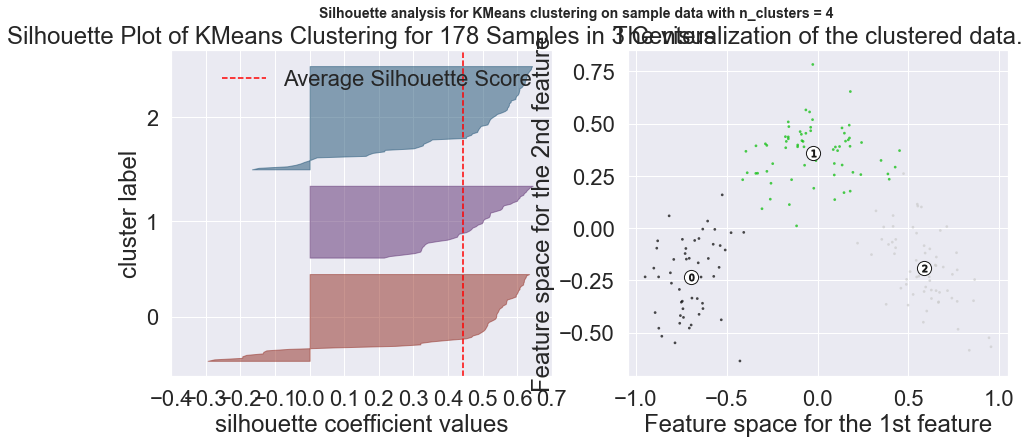

In [135]:
from yellowbrick.cluster import SilhouetteVisualizer

fig,(ax1,ax2) = plt.subplots(1,2,sharey=False)
fig.set_size_inches(15,6)



sil_visualizer1 = SilhouetteVisualizer(model_kmeans,ax= ax1, colors=['#922B21','#5B2C6F','#1B4F72'])
sil_visualizer1.fit(pca_std_df)


# 2nd Plot showing the actual clusters formed

import matplotlib.cm as cm
colors1 = cm.nipy_spectral(model_kmeans.labels_.astype(float) / 2) # 3 is number of clusters
ax2.scatter(pca_minmax_df.iloc[:, 0], pca_minmax_df.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors1, edgecolor='k')

# Labeling the clusters
centers1 = model_kmeans.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers1[:, 0], centers1[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers1):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')


ax2.set_title(label ="The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % 4),fontsize=14, fontweight='bold')

sil_visualizer1.show()
plt.show()

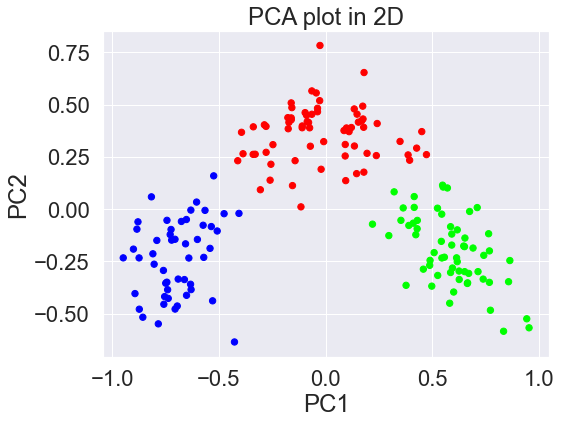

In [137]:
# Figure size
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(pca_minmax_df.iloc[:,0], pca_minmax_df.iloc[:,1], c=data['Kmeans_label'], cmap="brg", s=40)

# Aesthetics
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

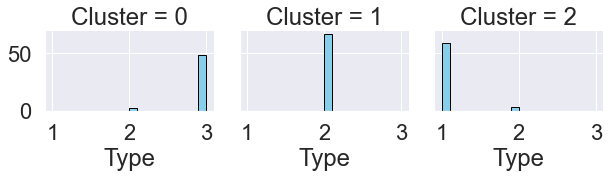

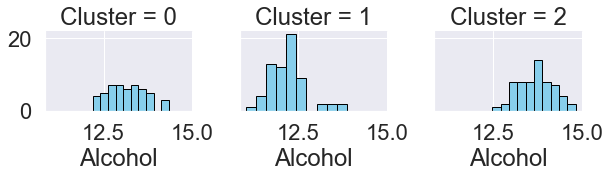

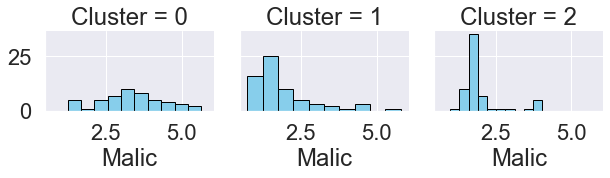

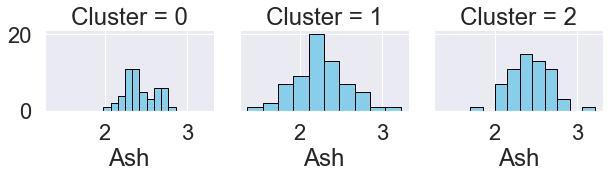

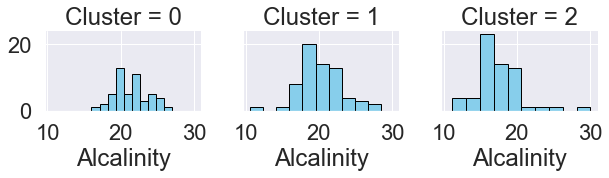

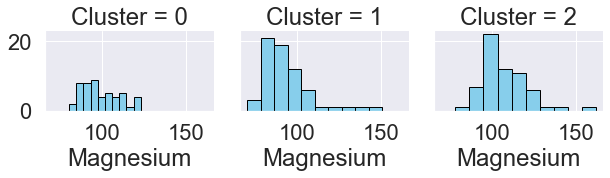

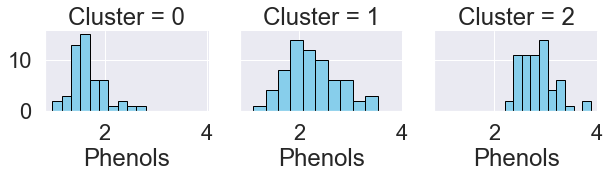

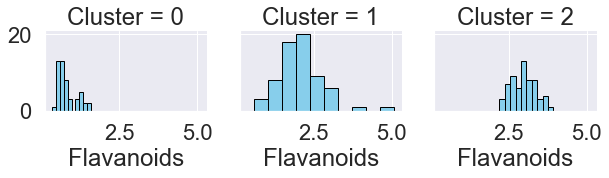

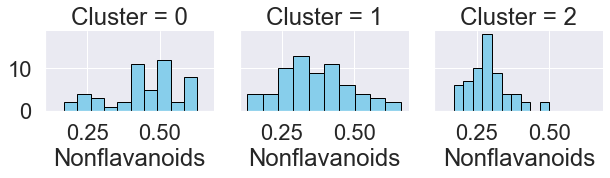

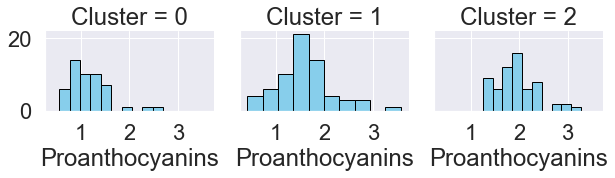

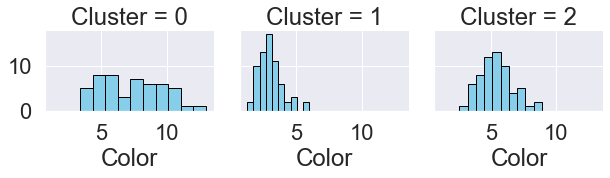

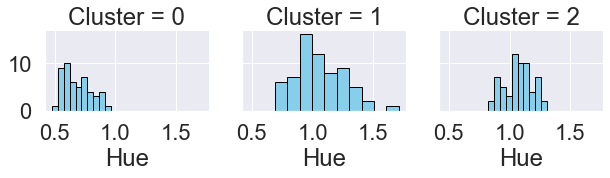

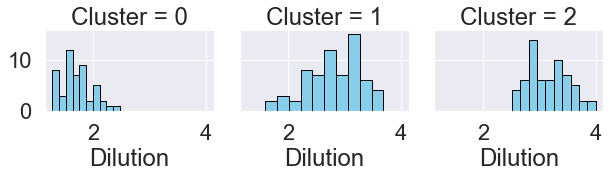

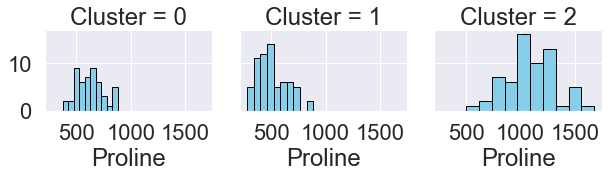

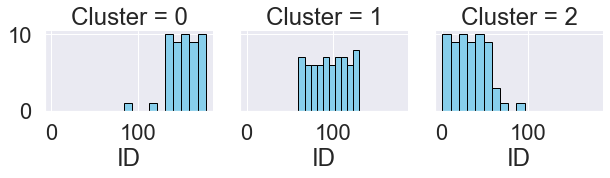

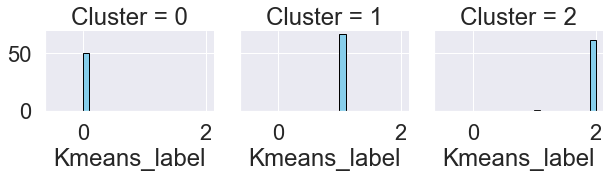

In [138]:
df1 = data.copy()
df1['Cluster'] = model_kmeans.labels_

aux=df1.columns.tolist()
aux[0:len(aux)-1]

sns.set(style="darkgrid", rc={'figure.figsize':(13,8)}, font_scale=2)

for cluster in aux[0:len(aux)-1]:
    grid = sns.FacetGrid(df1, col="Cluster")
    grid.map(plt.hist, cluster, color="skyblue", lw=1, edgecolor="black")

In [139]:
# Sorting elements based on cluster label assigned and taking average for insights.

cluster1 = pd.DataFrame(df1.loc[df1.Cluster==0].mean(),columns= ['Cluster1_avg'])
cluster2 = pd.DataFrame(df1.loc[df1.Cluster==1].mean(),columns= ['Cluster2_avg'])
cluster3 = pd.DataFrame(df1.loc[df1.Cluster==2].mean(),columns= ['Cluster2_avg'])

In [141]:
avg_df = pd.concat([cluster1,cluster2,cluster3],axis=1)
avg_df

Cluster1_avg  Cluster2_avg  Cluster2_avg
Type             2.9600        2.000000      1.048387    
Alcohol          13.1440       12.233333     13.701774   
Malic            3.3462        1.905000      1.981129    
Ash              2.4256        2.251212      2.441613    
Alcalinity       21.3300       20.218182     17.245161   
Magnesium        98.6400       93.469697     107.306452  
Phenols          1.6772        2.247273      2.844355    
Flavanoids       0.8070        2.069091      2.972581    
Nonflavanoids    0.4504        0.363485      0.288710    
Proanthocyanins  1.1564        1.602727      1.928710    
Color            7.2644        3.025758      5.442258    
Hue              0.6862        1.058576      1.068548    
Dilution         1.6988        2.792727      3.155161    
Proline          622.4400      508.696970    1100.822581 
ID               152.3800      95.530303     32.370968   
Kmeans_label     0.0000        1.000000      1.983871    
Cluster          0.0000        1.000000      2.000000

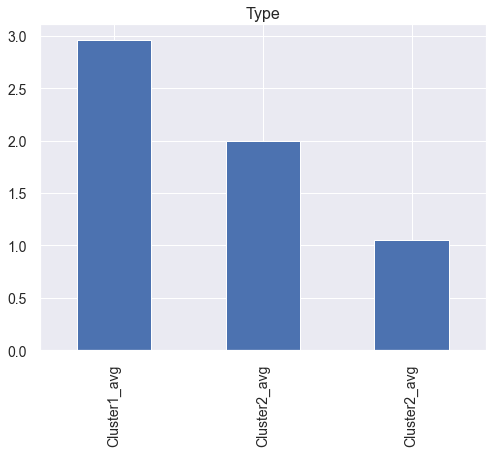

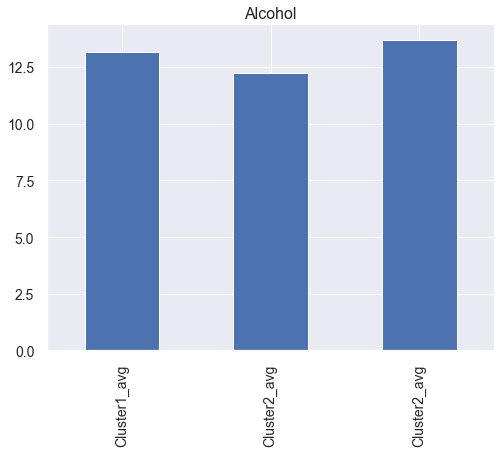

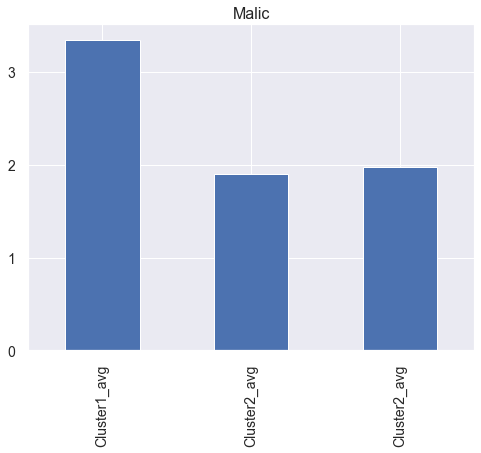

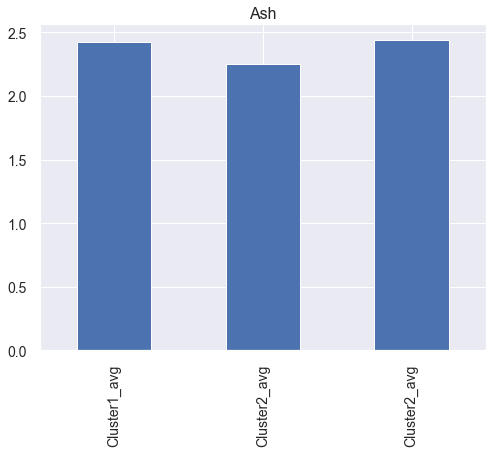

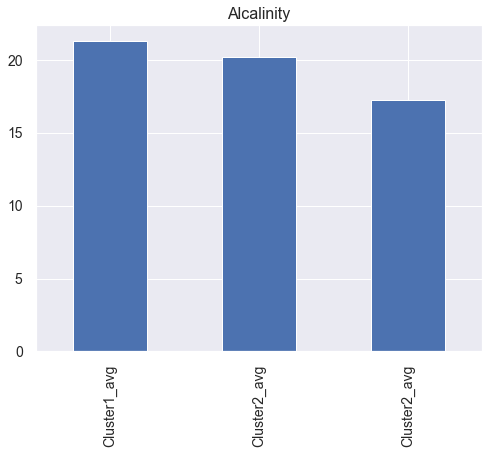

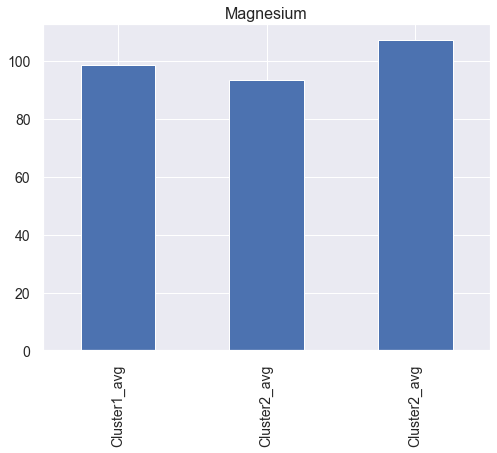

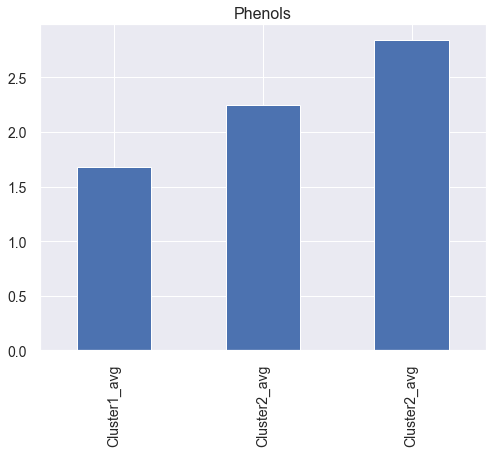

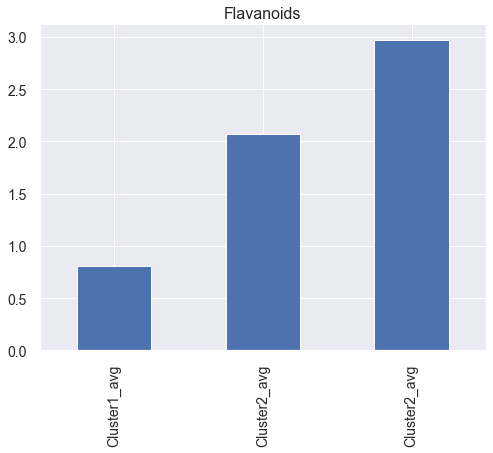

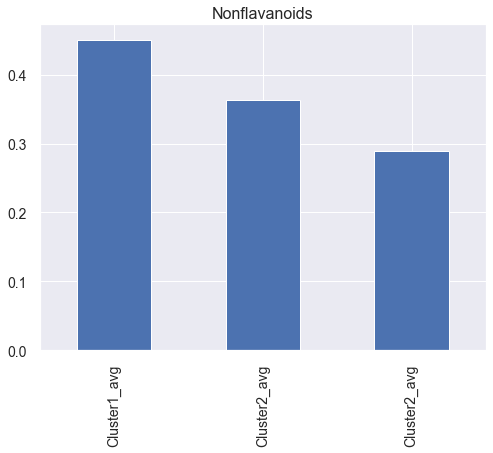

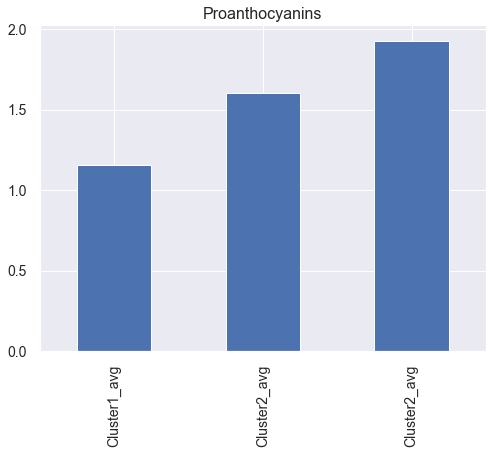

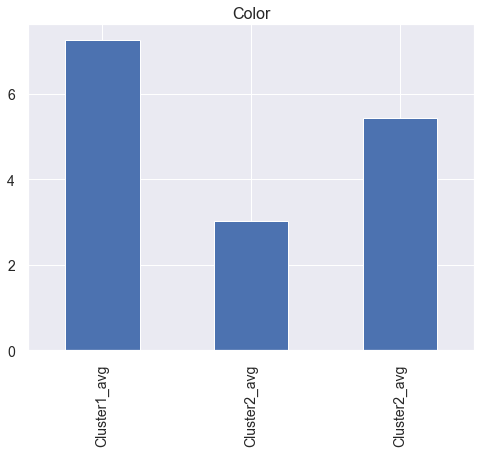

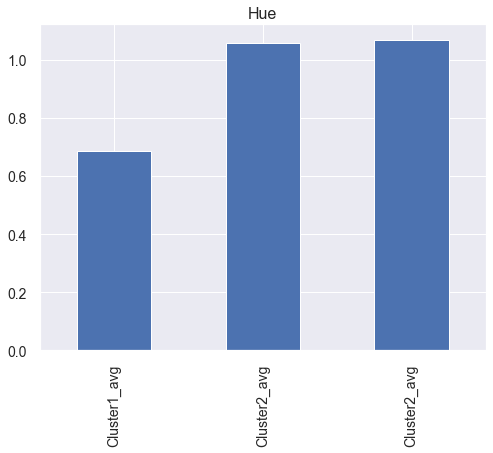

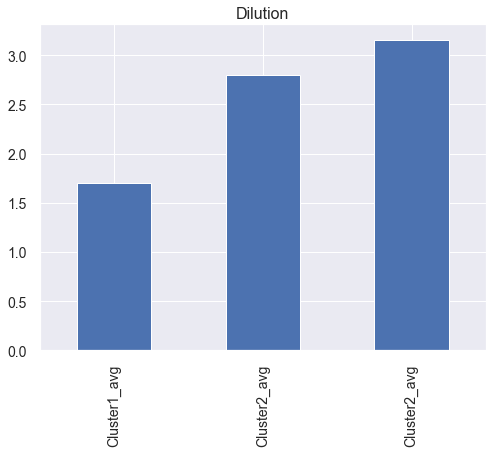

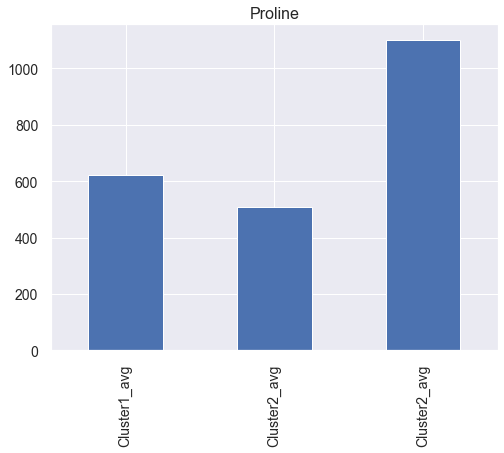

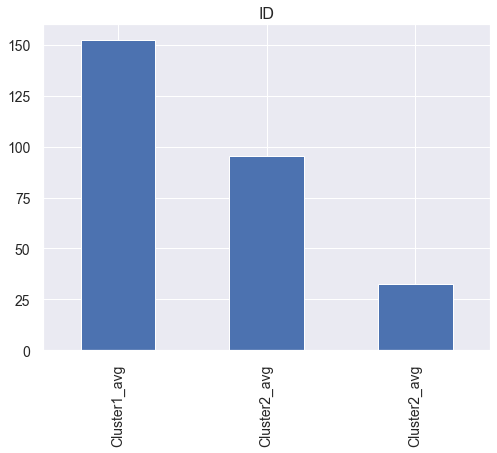

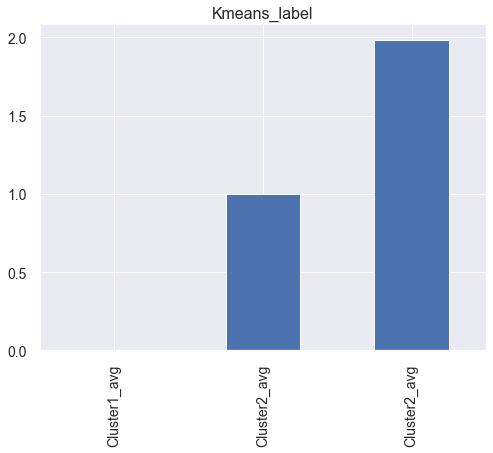

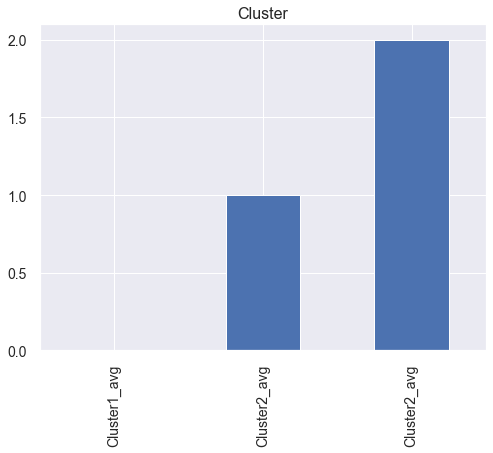

In [143]:
# Extract and plot one Column data .xs method
for i , row in avg_df.iterrows():
    fig = plt.subplots(figsize=(8,6))
    j = avg_df.xs(i ,axis = 0)
    plt.title(i, fontsize=16, fontweight=20)
    j.plot(kind='bar',fontsize=14)
    plt.show()
    print()

### Comparing Kmeans Clusters with the Original Classified Dataset using "Type" Feature

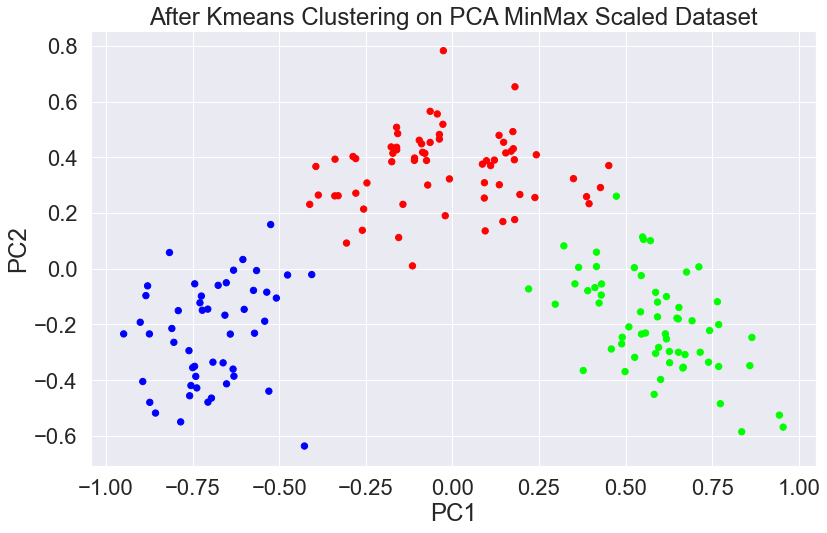

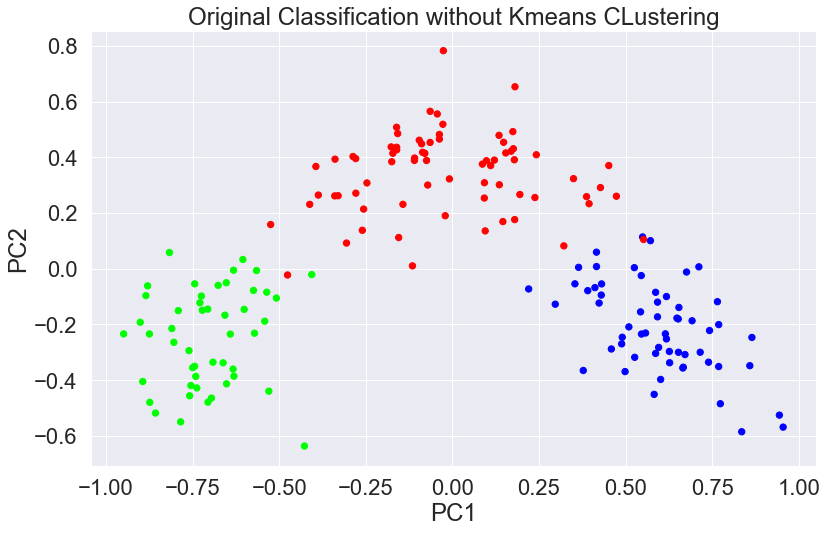

In [146]:
# Scatterplot
plt.scatter(pca_minmax_df.iloc[:,0], pca_minmax_df.iloc[:,1], c=df['Kmeans_label'], cmap="brg", s=40)

# Aesthetics
plt.title('After Kmeans Clustering on PCA MinMax Scaled Dataset')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Scatterplot
plt.scatter(pca_minmax_df.iloc[:,0], pca_minmax_df.iloc[:,1], c=data['Type'], cmap="brg", s=40)

# Aesthetics
plt.title('Original Classification without Kmeans CLustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [147]:
# Group data by Clusters (K=3)
display('After Applying PCA and Kmens CLustering on Dataset',df.groupby('Kmeans_label').agg(['mean']),'Original Classified Dataset',data.groupby('Type').agg(['mean']))

'After Applying PCA and Kmens CLustering on Dataset'

Alcohol     Malic       Ash Alcalinity   Magnesium   Phenols  \
                   mean      mean      mean       mean        mean      mean   
Kmeans_label                                                                   
0             13.144000  3.346200  2.425600  21.330000  98.640000   1.677200   
1             12.233333  1.905000  2.251212  20.218182  93.469697   2.247273   
2             13.701774  1.981129  2.441613  17.245161  107.306452  2.844355   

             Flavanoids Nonflavanoids Proanthocyanins     Color       Hue  \
                   mean          mean            mean      mean      mean   
Kmeans_label                                                                
0             0.807000   0.450400      1.156400        7.264400  0.686200   
1             2.069091   0.363485      1.602727        3.025758  1.058576   
2             2.972581   0.288710      1.928710        5.442258  1.068548   

              Dilution      Proline          ID  
                  mean         mean        mean  
Kmeans_label                                     
0             1.698800  622.440000   152.380000  
1             2.792727  508.696970   95.530303   
2             3.155161  1100.822581  32.370968

'Original Classified Dataset'

Alcohol     Malic       Ash Alcalinity   Magnesium   Phenols  \
           mean      mean      mean       mean        mean      mean   
Type                                                                   
1     13.744746  2.010678  2.455593  17.037288  106.338983  2.840169   
2     12.278732  1.932676  2.244789  20.238028  94.549296   2.258873   
3     13.153750  3.333750  2.437083  21.416667  99.312500   1.678750   

     Flavanoids Nonflavanoids Proanthocyanins     Color       Hue  Dilution  \
           mean          mean            mean      mean      mean      mean   
Type                                                                          
1     2.982373   0.290000      1.899322        5.528305  1.062034  3.157797   
2     2.080845   0.363662      1.630282        3.086620  1.056282  2.785352   
3     0.781458   0.447500      1.153542        7.396250  0.682708  1.683542   

          Proline     ID Kmeans_label  
             mean   mean         mean  
Type                                   
1     1115.711864  30.0   2.0          
2     519.507042   95.0   1.0          
3     629.895833   154.5  0.0

### t- SNE

In [148]:
# t-SNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(minmax_df)

# Convert to data frame
tsne_df = pd.DataFrame(data = X_tsne, columns = ['tsne comp. 1', 'tsne comp. 2'])

# Shape and preview
print(tsne_df.shape)
tsne_df.head()

(178, 2)


tsne comp. 1  tsne comp. 2
0 -7.149059      8.992506    
1 -5.968474      6.161299    
2 -11.466925     6.514084    
3 -11.395247     9.265672    
4 -8.718284      3.624259

### t-SNE plot in 2D coloured by class

Text(0, 0.5, 'tsne component 2')

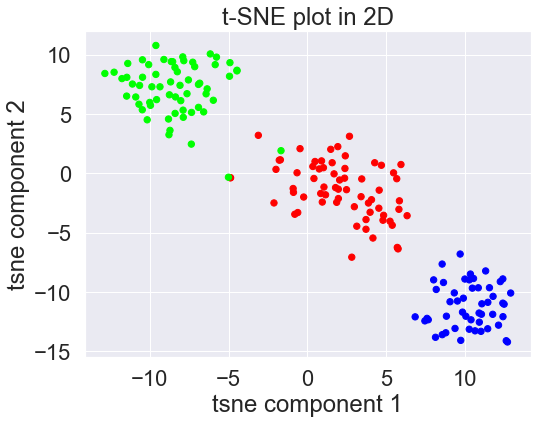

In [149]:
# Figure size
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(tsne_df.iloc[:,0], tsne_df.iloc[:,1], c=df['Kmeans_label'], cmap="brg", s=40)

# Aesthetics
plt.title('t-SNE plot in 2D')
plt.xlabel('tsne component 1')
plt.ylabel('tsne component 2')

### Hierarchical Clustering Algorithm

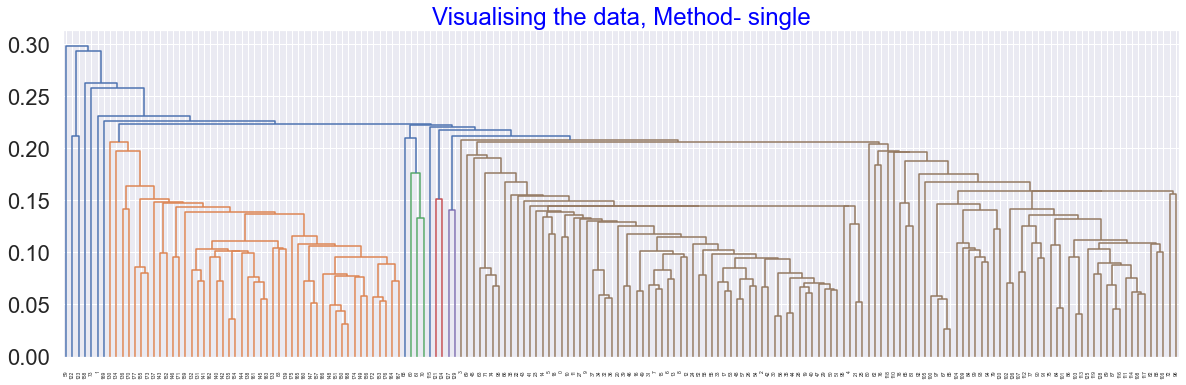

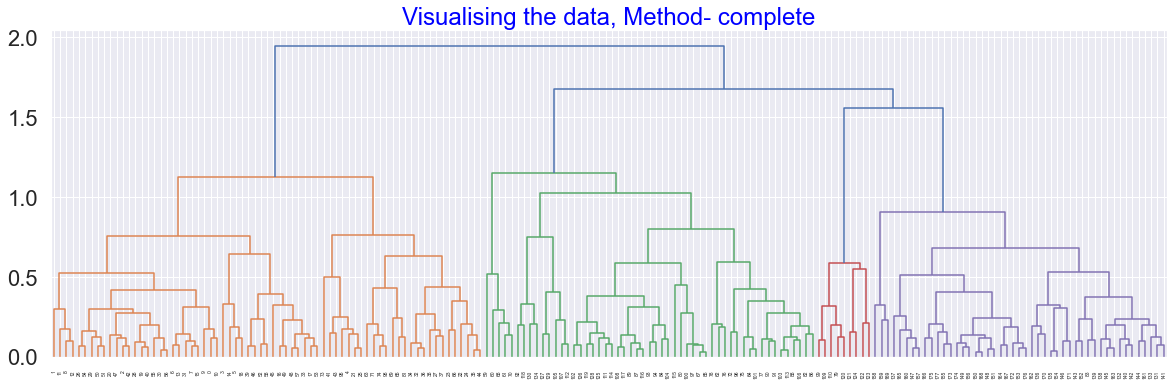

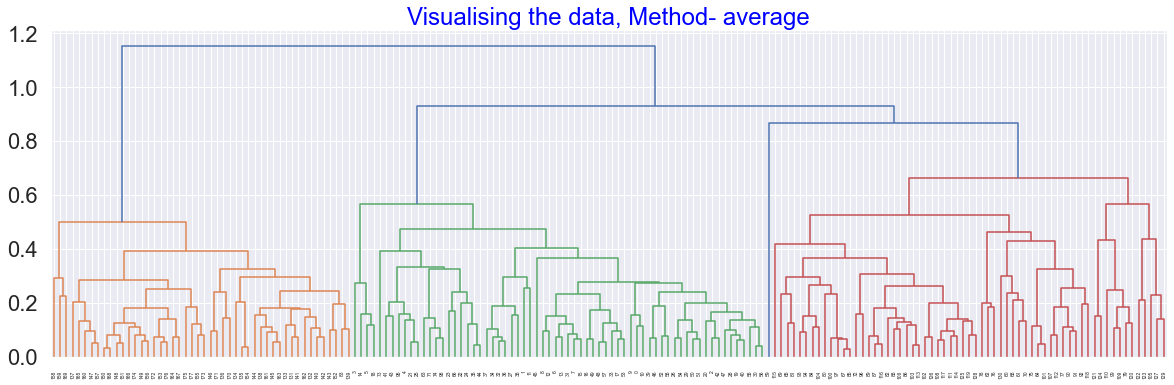

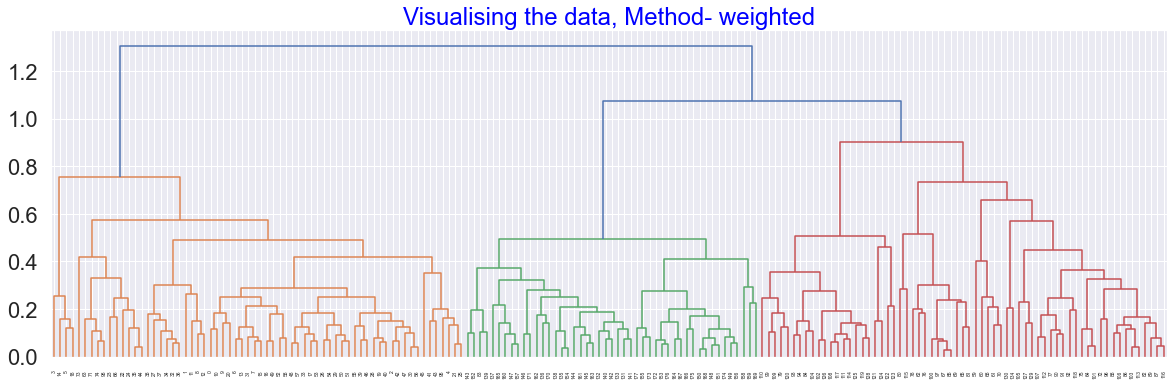

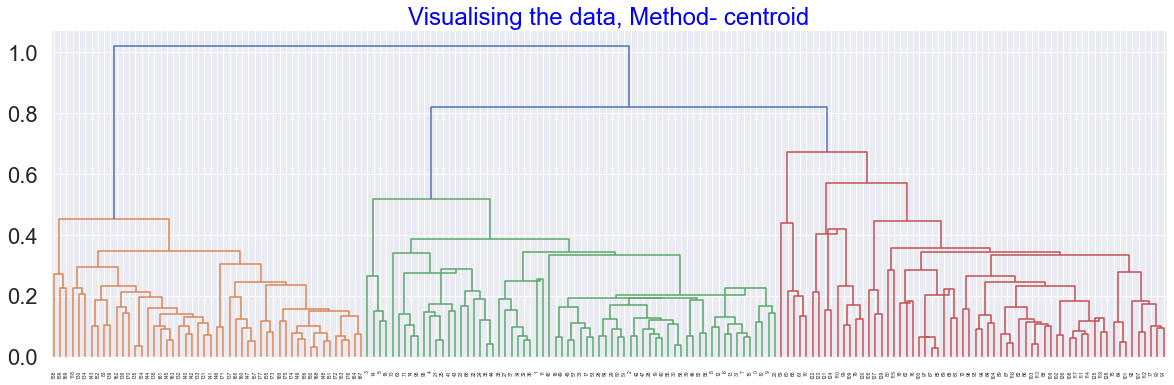

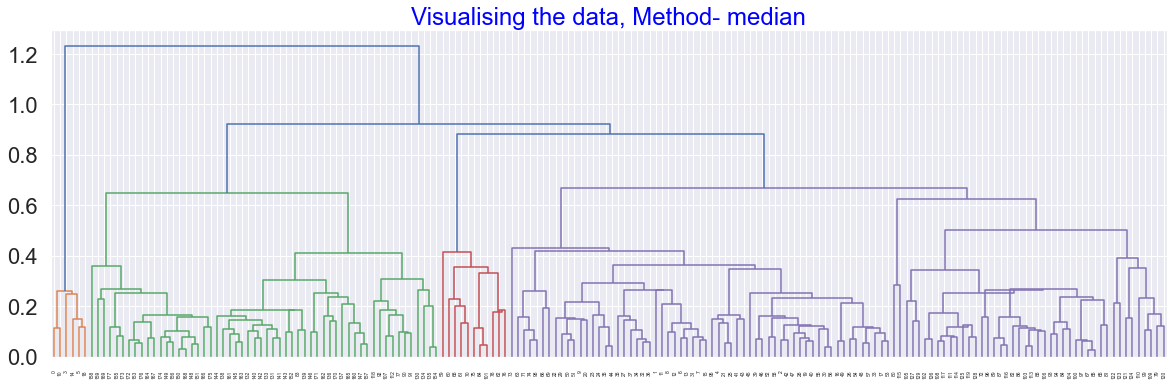

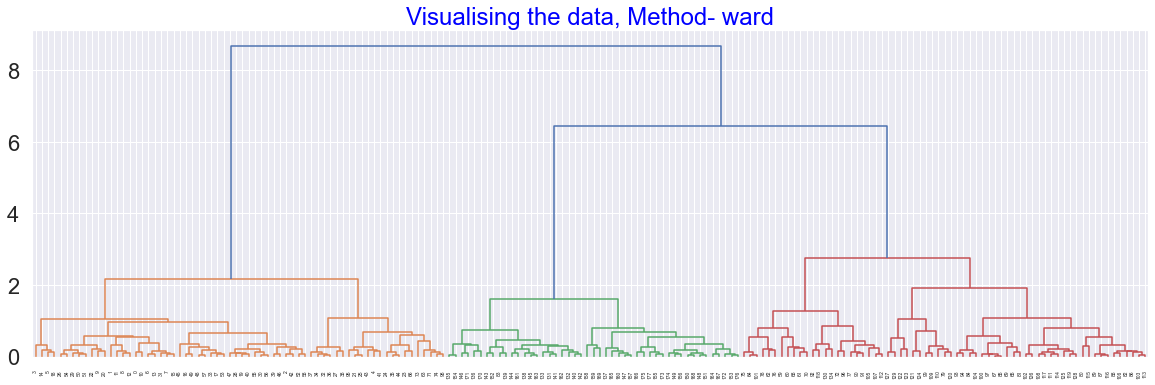

In [154]:
# Applying Dendrogram on data. Or you may apply it on Standardized/normalized indepedent variable data.
# Here diffrent linkage method from hyperparameter is used to see diff between methods for understanding. 
# Ward method is commanly used since it is simpler to visualize understanding.
# Find number of cluster's using color coding of dendrogram. Each color indicates one cluster.

for methods in ['single','complete','average','weighted','centroid','median','ward']: 
    plt.figure(figsize =(20, 6)) 
    
    dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}
    
    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram1 = sch.dendrogram(sch.linkage(pca_minmax_df, method = methods,optimal_ordering=False))

### Silhouette Score method for PCA MinMax Scaled Data

#### Applying Different Linkages using Euclidean Method for distance Calculation

In [155]:
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # by default it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(pca_minmax_df)
        silhouette_score1 = sil(pca_minmax_df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
        print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.4436935150655509

For n_clusters = 2 The average silhouette_score with linkage- complete : 0.4448273929121039

For n_clusters = 2 The average silhouette_score with linkage- average : 0.4598802263684806

For n_clusters = 2 The average silhouette_score with linkage- single : 0.1934738767787815

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.5124784618933621

For n_clusters = 3 The average silhouette_score with linkage- complete : 0.45525090342803287

For n_clusters = 3 The average silhouette_score with linkage- average : 0.5163908228025498

For n_clusters = 3 The average silhouette_score with linkage- single : -0.004466488818666442

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.4562664176188692

For n_clusters = 4 The average silhouette_score with linkage- complete : 0.46813138010224753

For n_clusters = 4 The average silhouette_score with linkage- average : 0.484069494

### Dendrogram on Standard Scaler Applied on Data

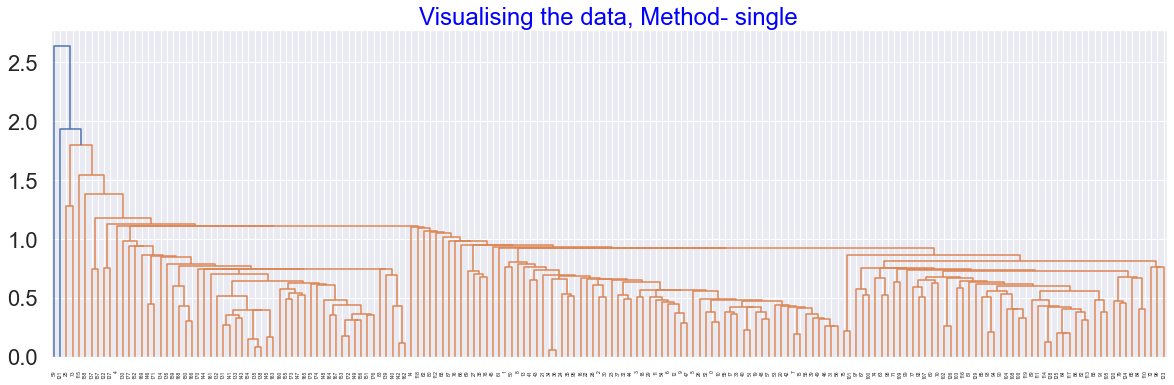

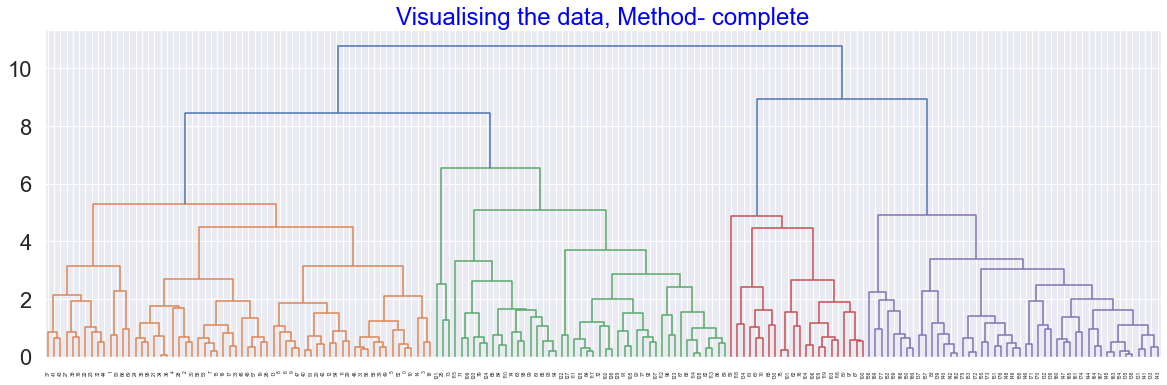

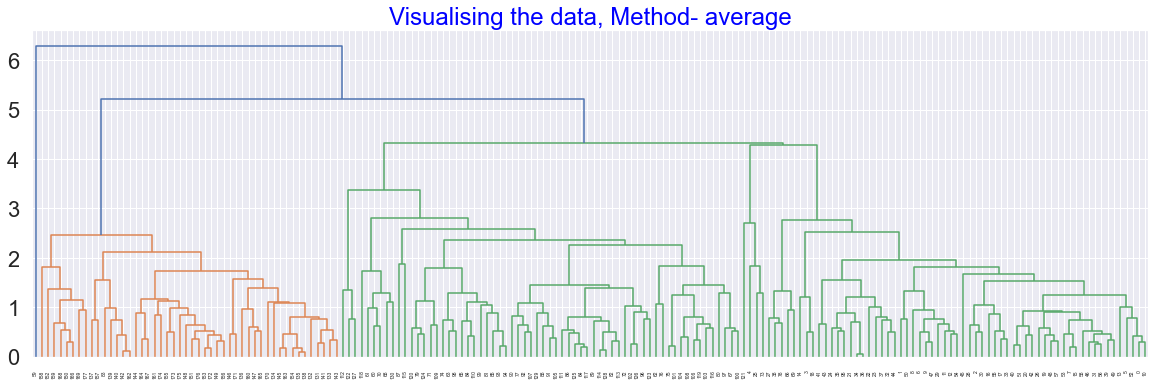

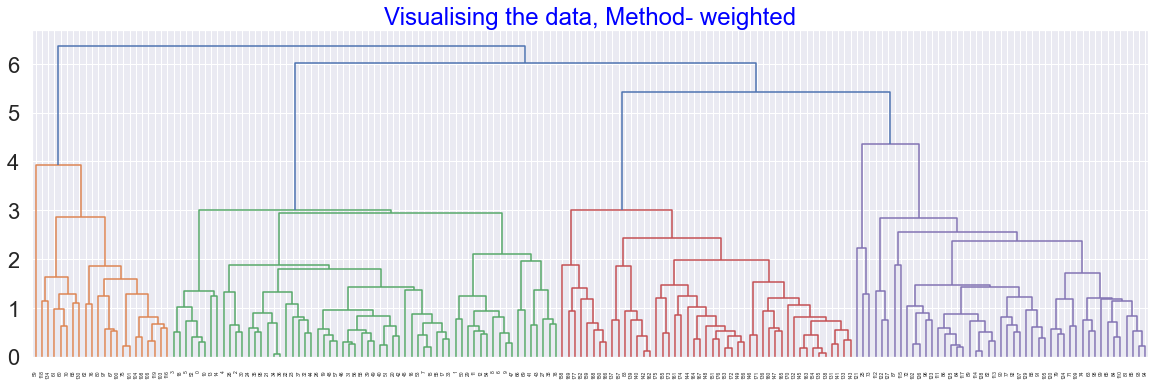

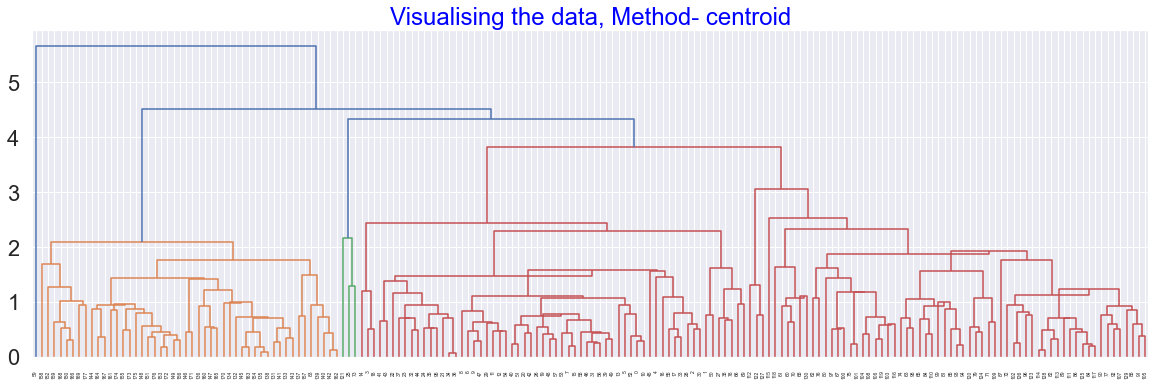

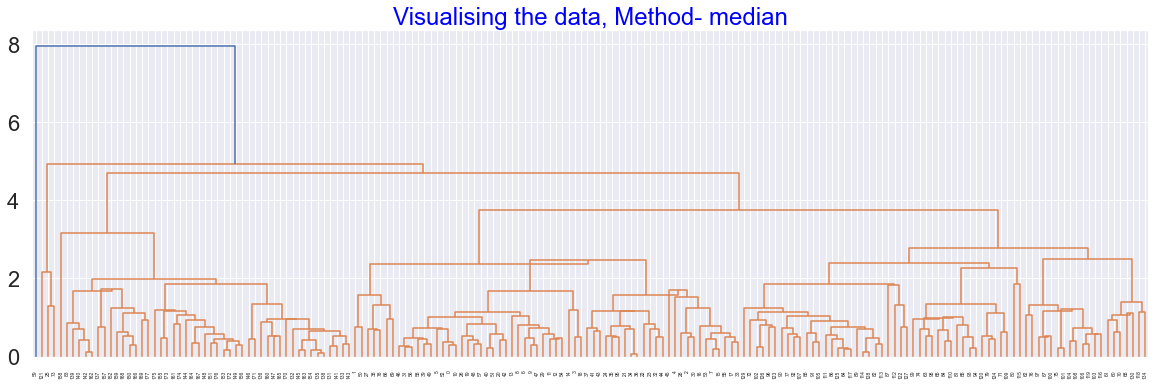

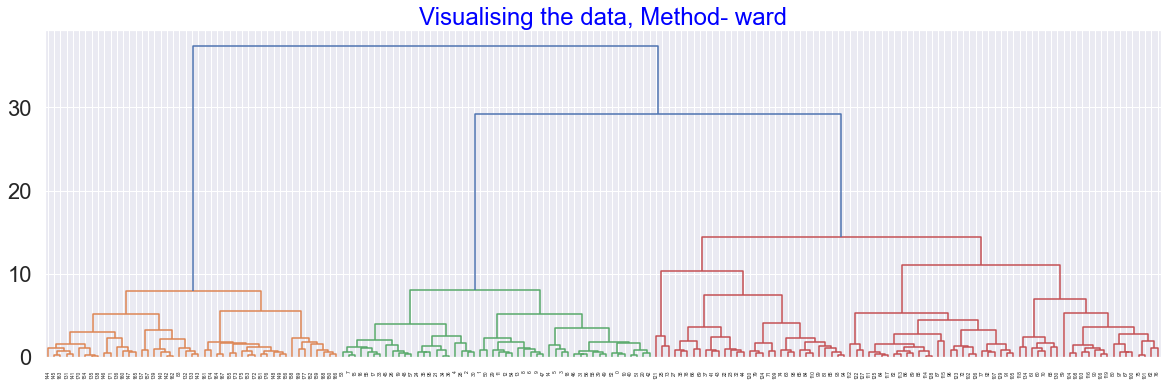

In [153]:
# Applying Dendrogram on data. Or you may apply it on Standardized/normalized indepedent variable data.
# Here diffrent linkage method from hyperparameter is used to see diff between methods for understanding. 
# Ward method is commanly used since it is simpler to visualize understanding.
# Find number of cluster's using color coding of dendrogram. Each color indicates one cluster.

for methods in ['single','complete','average','weighted','centroid','median','ward']: 
    plt.figure(figsize =(20, 6)) 
    
    dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}
    
    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram1 = sch.dendrogram(sch.linkage(pca_std_df, method = methods,optimal_ordering=False))

### Silhouette Score method for PCA Standard Scaled Data

#### Applying Different Linkages using Euclidean Method for distance Calculation

In [157]:
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # by default it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(pca_std_df)
        silhouette_score1 = sil(pca_std_df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.4187797009092467
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.34372787707571917
For n_clusters = 2 The average silhouette_score with linkage- average : 0.3485404154932633
For n_clusters = 2 The average silhouette_score with linkage- single : 0.3485404154932633

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.4355352661667812
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.29482654329265306
For n_clusters = 3 The average silhouette_score with linkage- average : 0.4025547835526692
For n_clusters = 3 The average silhouette_score with linkage- single : 0.25789382473384287

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.3739703958691179
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.41711883309849057
For n_clusters = 4 The average silhouette_score with linkage- average : 0.46890675907642115


#### Applying Different Linkages using Different Distance Methods

In [158]:
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["complete", "average", "single"]:
        for affinities in ["euclidean", "l1", "l2","manhattan", "cosine"]:
            hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,affinity=affinities,linkage=linkages) # by default it takes linkage 'ward'
            hie_labels1 = hie_cluster1.fit_predict(pca_std_df)
            silhouette_score1 = sil(pca_std_df, hie_labels1)
            print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages,"and Affinity-",affinities,':',silhouette_score1)
        print()

For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- euclidean : 0.34372787707571917
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- l1 : 0.22011950029106103
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- l2 : 0.34372787707571917
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- manhattan : 0.22011950029106103
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- cosine : 0.42467159593806836

For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- euclidean : 0.3485404154932633
For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- l1 : 0.3485404154932633
For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- l2 : 0.3485404154932633
For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- manhattan : 0.34

#### Run Hierarchical Clustering.(Agglomerative Clustering) For PCA on Standard Scaled Data

In [159]:
agg_clustering = AgglomerativeClustering(n_clusters=4, linkage='complete', affinity='l1')
y_pred_hie = agg_clustering.fit_predict(pca_std_df)
print(y_pred_hie.shape)
y_pred_hie

(178,)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int64)

In [160]:
# Cluster numbers

agg_clustering.n_clusters_

4

In [161]:
# Clustering Score

(sil(pca_std_df, agg_clustering.labels_)*100).round(3)

47.312

#### Putting Cluster lables into original dataset And analysis of the same

In [164]:
# Concating Labels with main dataset copy

df['Hierarchical_labels'] = agg_clustering.labels_
df.head()

Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0  14.23    1.71   2.43  15.6        127        2.80     3.06         
1  13.20    1.78   2.14  11.2        100        2.65     2.76         
2  13.16    2.36   2.67  18.6        101        2.80     3.24         
3  14.37    1.95   2.50  16.8        113        3.85     3.49         
4  13.24    2.59   2.87  21.0        118        2.80     2.69         

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  ID  \
0  0.28           2.29             5.64   1.04  3.92      1065     1    
1  0.26           1.28             4.38   1.05  3.40      1050     2    
2  0.30           2.81             5.68   1.03  3.17      1185     3    
3  0.24           2.18             7.80   0.86  3.45      1480     4    
4  0.39           1.82             4.32   1.04  2.93      735      5    

   Kmeans_label  Hierarchical_labels  
0  2             1                    
1  2             1                    
2  2             1                    
3  2             1                    
4  2             1

In [165]:
df.groupby('Hierarchical_labels').agg(['mean'])

Alcohol     Malic       Ash Alcalinity   Magnesium  \
                          mean      mean      mean       mean        mean   
Hierarchical_labels                                                         
0                    12.249516  1.972097  2.249839  20.193548  92.000000    
1                    13.622615  1.927692  2.395692  16.955385  106.738462   
2                    13.157708  3.386042  2.437083  21.510417  98.541667    
3                    12.533333  1.923333  3.016667  27.833333  127.333333   

                      Phenols Flavanoids Nonflavanoids Proanthocyanins  \
                         mean       mean          mean            mean   
Hierarchical_labels                                                      
0                    2.182419  1.959194   0.370645      1.529516         
1                    2.821385  2.942154   0.283077      1.946923         
2                    1.681667  0.788542   0.455833      1.167708         
3                    3.036667  3.550000   0.383333      1.916667         

                        Color       Hue  Dilution      Proline          ID  \
                         mean      mean      mean         mean        mean   
Hierarchical_labels                                                          
0                    2.937097  1.042516  2.740000  497.564516   97.403226    
1                    5.378308  1.070308  3.124308  1072.276923  35.400000    
2                    7.410833  0.684375  1.698542  627.500000   153.520833   
3                    4.310000  1.123333  3.463333  760.000000   74.000000    

                    Kmeans_label  
                            mean  
Hierarchical_labels               
0                    0.967742     
1                    1.923077     
2                    0.000000     
3                    1.666667

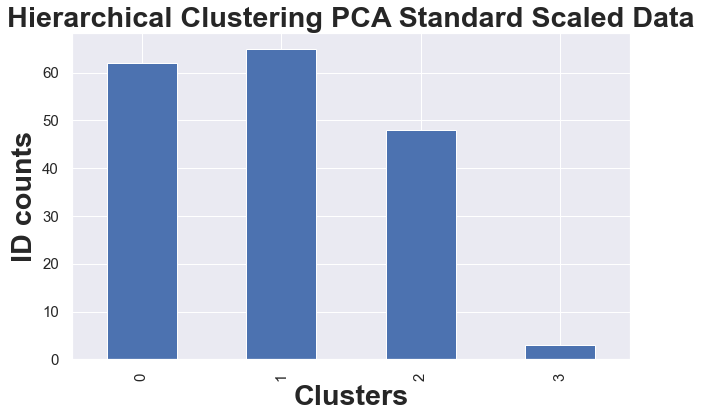

In [168]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
df.groupby(['Hierarchical_labels']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering PCA Standard Scaled Data',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

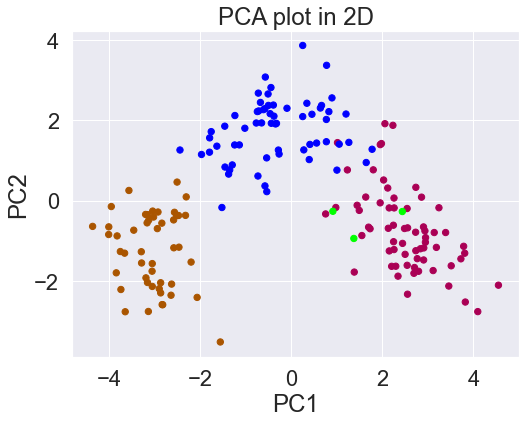

In [169]:
# Figure size
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(pca_std_df.iloc[:,0], pca_std_df.iloc[:,1], c=df['Hierarchical_labels'], cmap="brg", s=40)

# Aesthetics
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

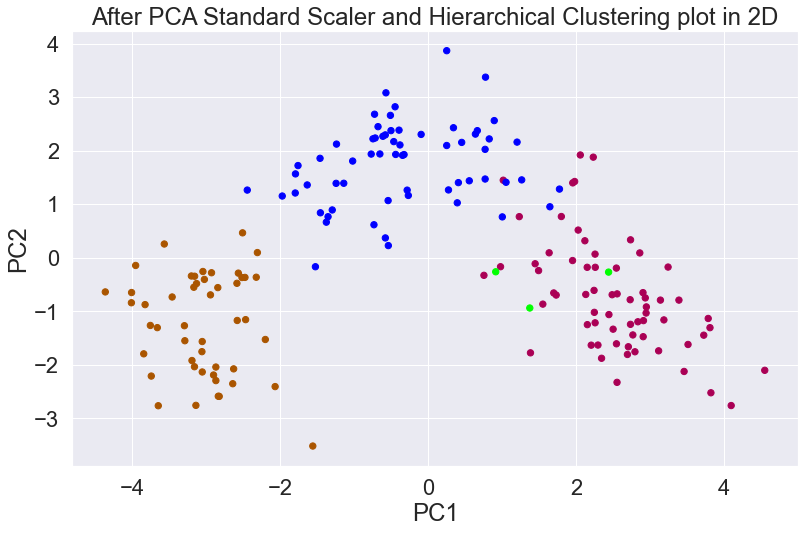

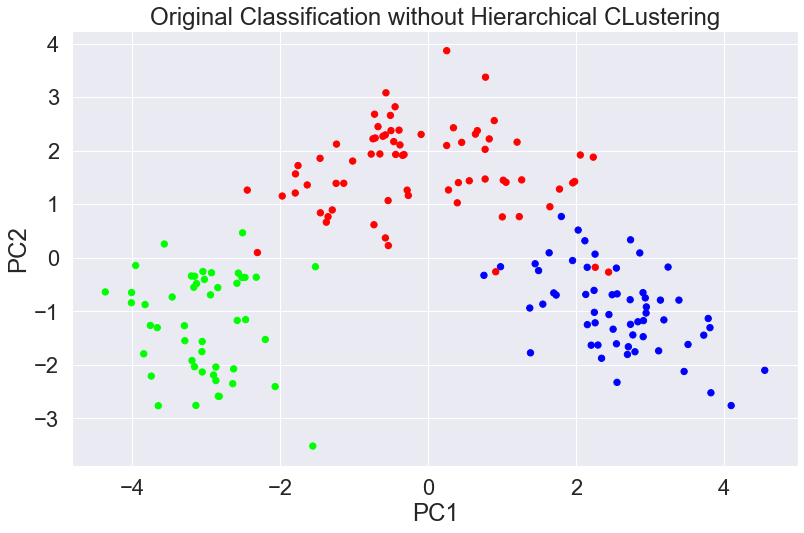

In [177]:
# Scatterplot
plt.scatter(pca_std_df.iloc[:,0], pca_std_df.iloc[:,1], c=df['Hierarchical_labels'], cmap="brg", s=40)

# Aesthetics
plt.title('After PCA Standard Scaler and Hierarchical Clustering plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Scatterplot
plt.scatter(pca_std_df.iloc[:,0], pca_std_df.iloc[:,1], c=data['Type'], cmap="brg", s=40)

# Aesthetics
plt.title('Original Classification without Hierarchical CLustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [178]:
# Group data by Clusters (Clusters=4)
display('After Applying Hierarchical Clustering on PCA Standard Scaled Dataset',df.groupby('Hierarchical_labels').agg(['mean']),'Original Classified Dataset',data.groupby('Type').agg(['mean']))

'After Applying Hierarchical Clustering on PCA Standard Scaled Dataset'

Alcohol     Malic       Ash Alcalinity   Magnesium  \
                          mean      mean      mean       mean        mean   
Hierarchical_labels                                                         
0                    12.249516  1.972097  2.249839  20.193548  92.000000    
1                    13.622615  1.927692  2.395692  16.955385  106.738462   
2                    13.157708  3.386042  2.437083  21.510417  98.541667    
3                    12.533333  1.923333  3.016667  27.833333  127.333333   

                      Phenols Flavanoids Nonflavanoids Proanthocyanins  \
                         mean       mean          mean            mean   
Hierarchical_labels                                                      
0                    2.182419  1.959194   0.370645      1.529516         
1                    2.821385  2.942154   0.283077      1.946923         
2                    1.681667  0.788542   0.455833      1.167708         
3                    3.036667  3.550000   0.383333      1.916667         

                        Color       Hue  Dilution      Proline          ID  \
                         mean      mean      mean         mean        mean   
Hierarchical_labels                                                          
0                    2.937097  1.042516  2.740000  497.564516   97.403226    
1                    5.378308  1.070308  3.124308  1072.276923  35.400000    
2                    7.410833  0.684375  1.698542  627.500000   153.520833   
3                    4.310000  1.123333  3.463333  760.000000   74.000000    

                    Kmeans_label  
                            mean  
Hierarchical_labels               
0                    0.967742     
1                    1.923077     
2                    0.000000     
3                    1.666667

'Original Classified Dataset'

Alcohol     Malic       Ash Alcalinity   Magnesium   Phenols  \
           mean      mean      mean       mean        mean      mean   
Type                                                                   
1     13.744746  2.010678  2.455593  17.037288  106.338983  2.840169   
2     12.278732  1.932676  2.244789  20.238028  94.549296   2.258873   
3     13.153750  3.333750  2.437083  21.416667  99.312500   1.678750   

     Flavanoids Nonflavanoids Proanthocyanins     Color       Hue  Dilution  \
           mean          mean            mean      mean      mean      mean   
Type                                                                          
1     2.982373   0.290000      1.899322        5.528305  1.062034  3.157797   
2     2.080845   0.363662      1.630282        3.086620  1.056282  2.785352   
3     0.781458   0.447500      1.153542        7.396250  0.682708  1.683542   

          Proline     ID Kmeans_label  
             mean   mean         mean  
Type                                   
1     1115.711864  30.0   2.0          
2     519.507042   95.0   1.0          
3     629.895833   154.5  0.0

#### Run Hierarchical Clustering.(Agglomerative Clustering) For PCA on MinMaxScaled Data

In [179]:
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='average', affinity='l2')
y_pred_hie = agg_clustering.fit_predict(pca_minmax_df)
print(y_pred_hie.shape)
y_pred_hie

(178,)


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0,
       2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [180]:
# Cluster numbers

agg_clustering.n_clusters_

3

In [181]:
# Clustering Score

(sil(pca_minmax_df, agg_clustering.labels_)*100).round(3)

51.639

#### Putting Cluster lables into original dataset And analysis of the same

In [182]:
# Concating Labels with main dataset copy

df['Hierarchical_labels'] = agg_clustering.labels_
df.head()

Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0  14.23    1.71   2.43  15.6        127        2.80     3.06         
1  13.20    1.78   2.14  11.2        100        2.65     2.76         
2  13.16    2.36   2.67  18.6        101        2.80     3.24         
3  14.37    1.95   2.50  16.8        113        3.85     3.49         
4  13.24    2.59   2.87  21.0        118        2.80     2.69         

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  ID  \
0  0.28           2.29             5.64   1.04  3.92      1065     1    
1  0.26           1.28             4.38   1.05  3.40      1050     2    
2  0.30           2.81             5.68   1.03  3.17      1185     3    
3  0.24           2.18             7.80   0.86  3.45      1480     4    
4  0.39           1.82             4.32   1.04  2.93      735      5    

   Kmeans_label  Hierarchical_labels  
0  2             2                    
1  2             2                    
2  2             2                    
3  2             2                    
4  2             2

In [183]:
df.groupby('Hierarchical_labels').agg(['mean'])

Alcohol     Malic       Ash Alcalinity   Magnesium  \
                          mean      mean      mean       mean        mean   
Hierarchical_labels                                                         
0                    12.226094  1.964219  2.244531  20.076563  93.890625    
1                    13.157708  3.386042  2.437083  21.510417  98.541667    
2                    13.637424  1.933788  2.433485  17.465152  106.287879   

                      Phenols Flavanoids Nonflavanoids Proanthocyanins  \
                         mean       mean          mean            mean   
Hierarchical_labels                                                      
0                    2.157969  1.987656   0.372812      1.565781         
1                    1.681667  0.788542   0.455833      1.167708         
2                    2.874242  2.971970   0.282879      1.923030         

                        Color       Hue  Dilution      Proline          ID  \
                         mean      mean      mean         mean        mean   
Hierarchical_labels                                                          
0                    2.994687  1.042437  2.746875  503.125000   97.578125    
1                    7.410833  0.684375  1.698542  627.500000   153.520833   
2                    5.347879  1.073636  3.144697  1070.106061  35.106061    

                    Kmeans_label  
                            mean  
Hierarchical_labels               
0                    0.968750     
1                    0.000000     
2                    1.939394

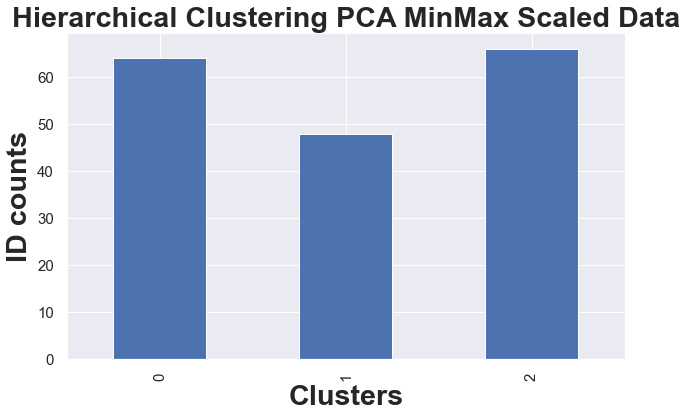

In [185]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
df.groupby(['Hierarchical_labels']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering PCA MinMax Scaled Data',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

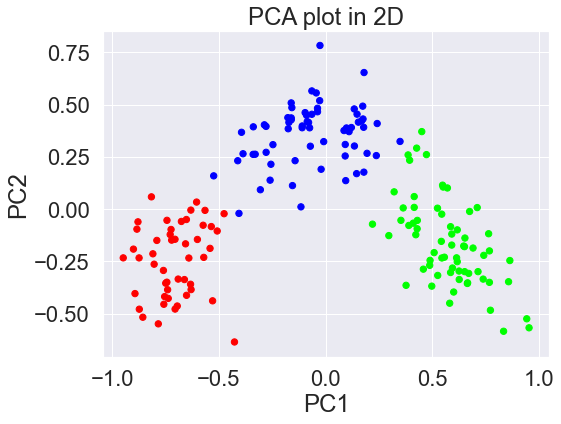

In [187]:
# Figure size
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(pca_minmax_df.iloc[:,0], pca_minmax_df.iloc[:,1], c=df['Hierarchical_labels'], cmap="brg", s=40)

# Aesthetics
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

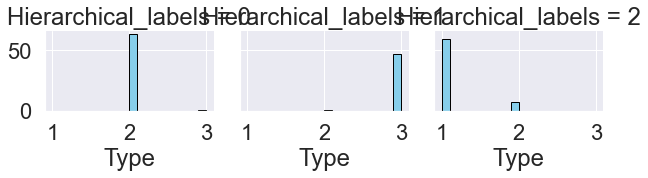

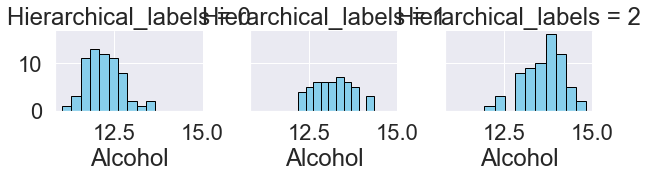

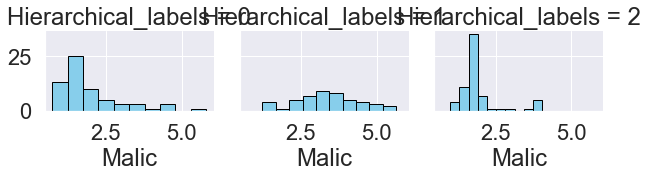

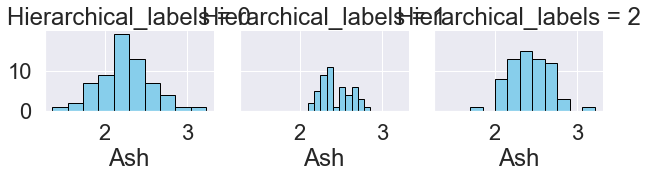

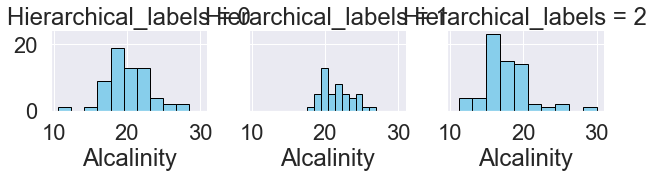

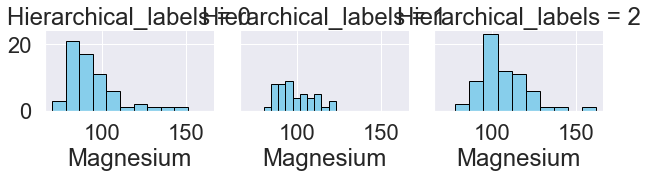

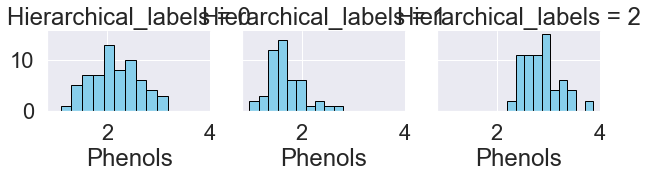

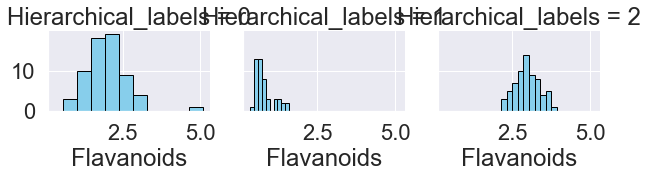

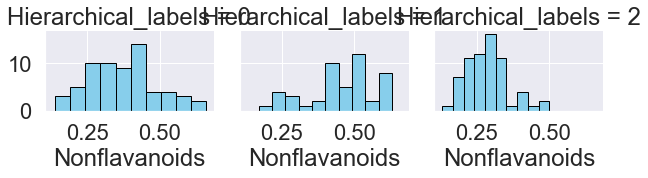

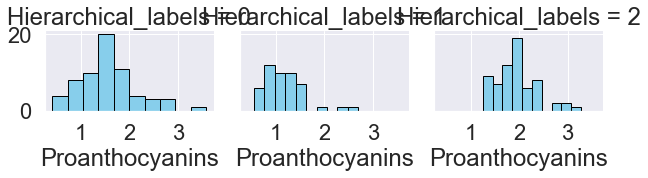

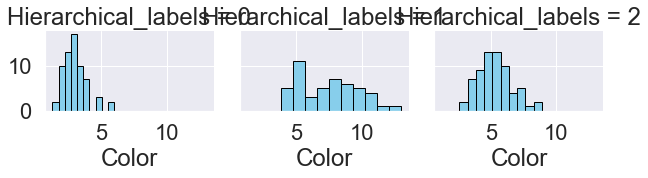

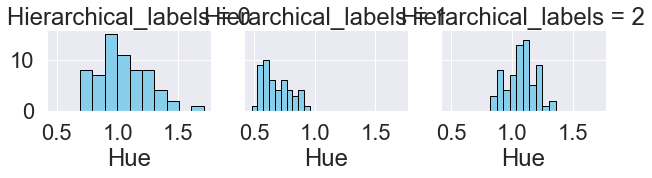

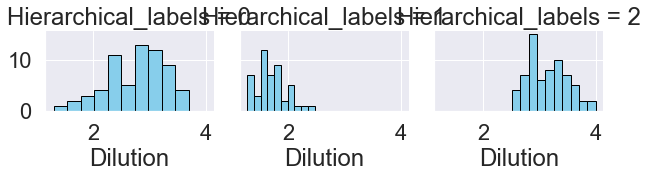

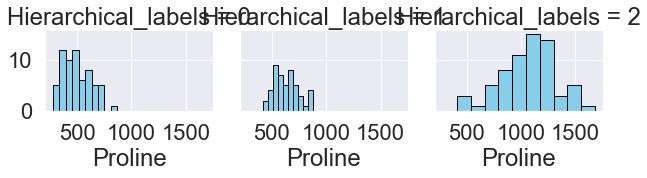

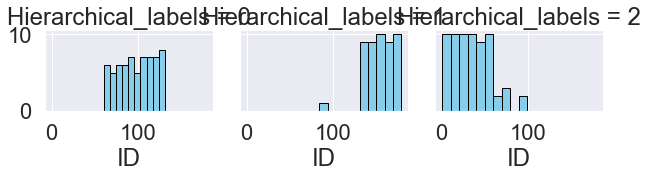

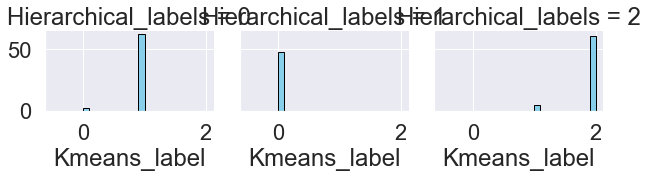

In [189]:
df1 = data.copy()
df1["Hierarchical_labels"]=agg_clustering.labels_

aux=df1.columns.tolist()
aux[0:len(aux)-1]

sns.set(style="darkgrid", rc={'figure.figsize':(13,8)}, font_scale=2)

for cluster in aux[0:len(aux)-1]:
    grid = sns.FacetGrid(df1, col="Hierarchical_labels")
    grid.map(plt.hist,cluster , color="skyblue", lw=1, edgecolor="black")

In [190]:
# Sorting elements based on cluster label assigned and taking average for insights.

cluster1 = pd.DataFrame(df1.loc[df1.Hierarchical_labels==0].mean(),columns= ['Cluster1_avg'])
cluster2 = pd.DataFrame(df1.loc[df1.Hierarchical_labels==1].mean(),columns= ['Cluster2_avg'])
cluster3 = pd.DataFrame(df1.loc[df1.Hierarchical_labels==2].mean(),columns= ['Cluster2_avg'])

In [191]:
avg_df = pd.concat([cluster1,cluster2,cluster3],axis=1)
avg_df

Cluster1_avg  Cluster2_avg  Cluster2_avg
Type                 2.015625      2.979167      1.106061    
Alcohol              12.226094     13.157708     13.637424   
Malic                1.964219      3.386042      1.933788    
Ash                  2.244531      2.437083      2.433485    
Alcalinity           20.076563     21.510417     17.465152   
Magnesium            93.890625     98.541667     106.287879  
Phenols              2.157969      1.681667      2.874242    
Flavanoids           1.987656      0.788542      2.971970    
Nonflavanoids        0.372813      0.455833      0.282879    
Proanthocyanins      1.565781      1.167708      1.923030    
Color                2.994688      7.410833      5.347879    
Hue                  1.042438      0.684375      1.073636    
Dilution             2.746875      1.698542      3.144697    
Proline              503.125000    627.500000    1070.106061 
ID                   97.578125     153.520833    35.106061   
Kmeans_label         0.968750      0.000000      1.924242    
Hierarchical_labels  0.000000      1.000000      2.000000

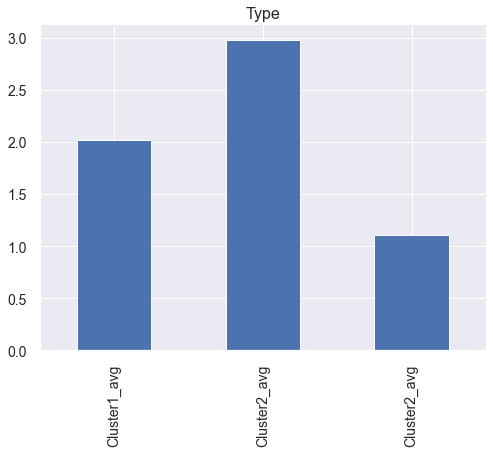

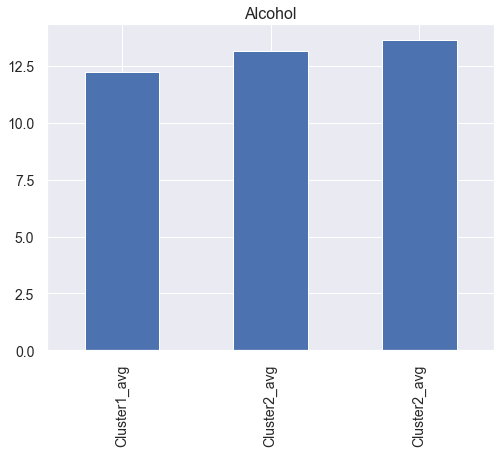

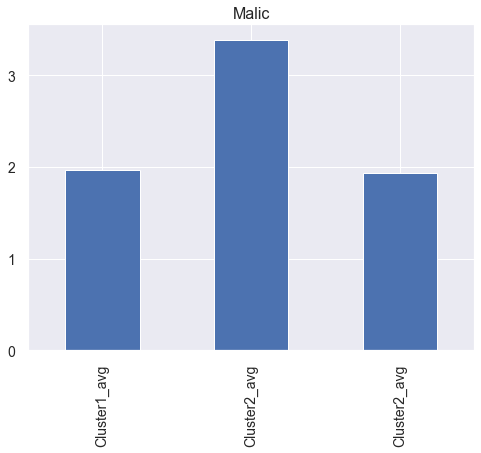

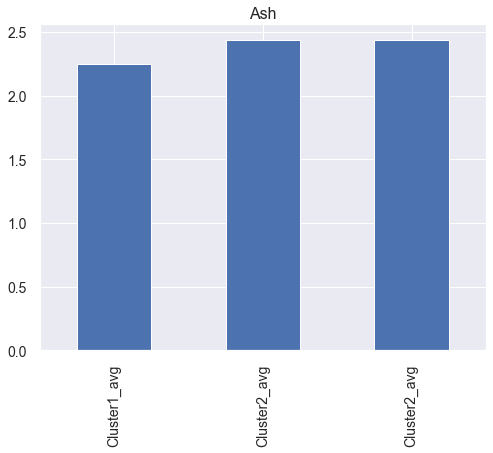

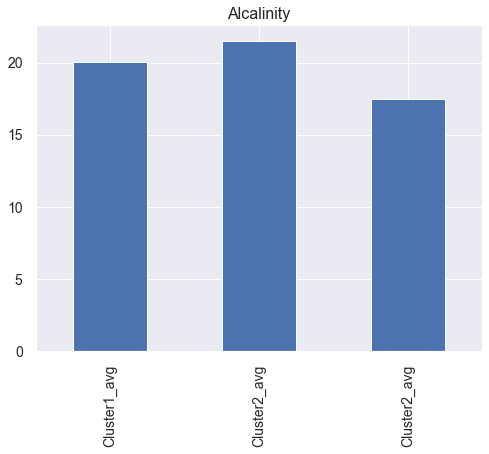

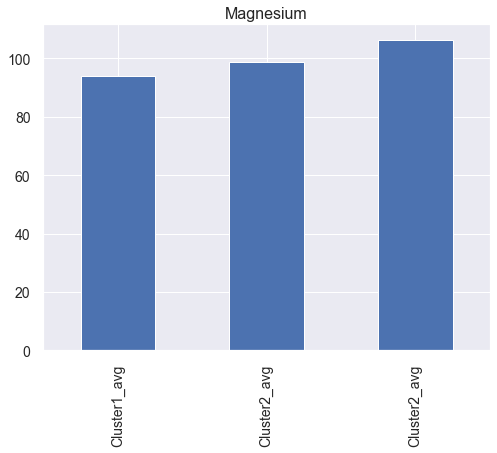

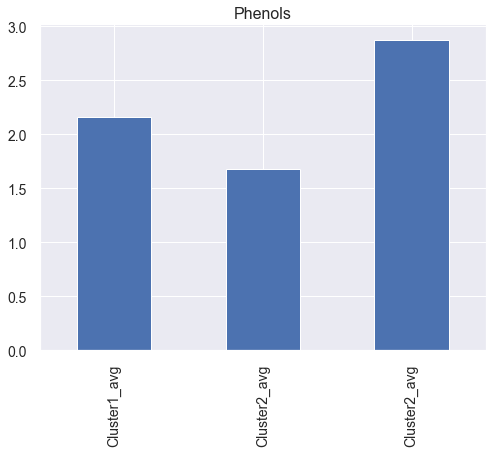

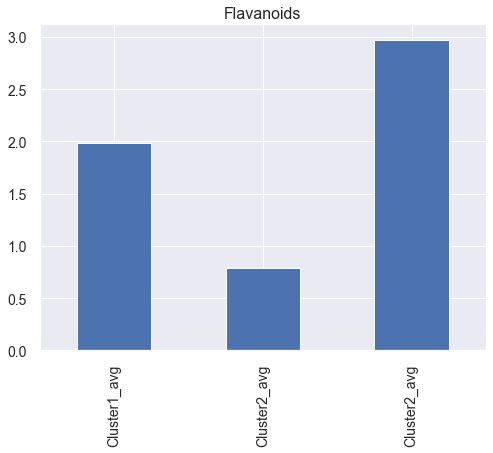

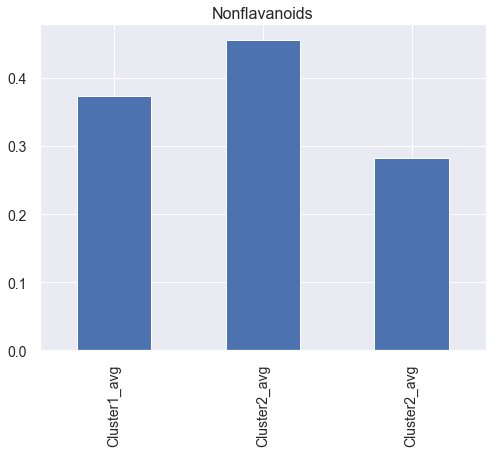

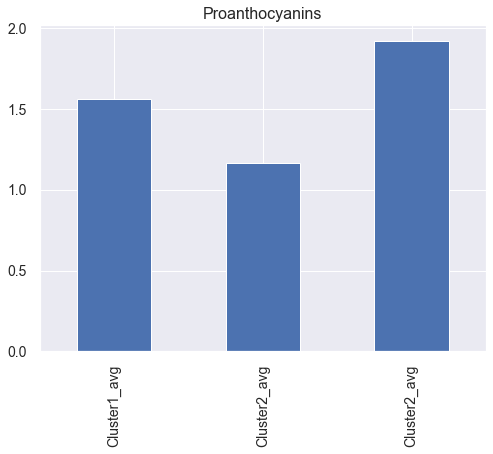

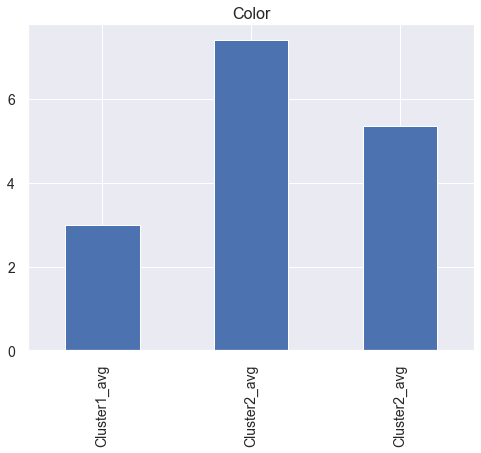

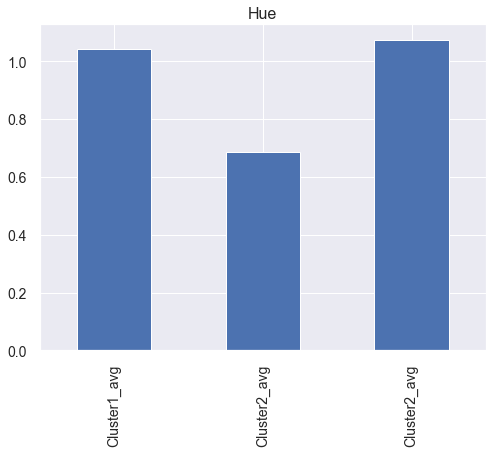

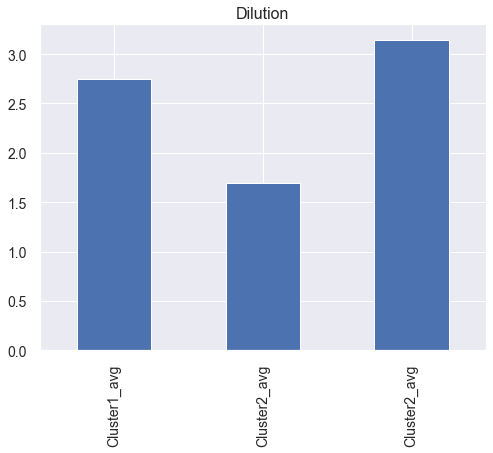

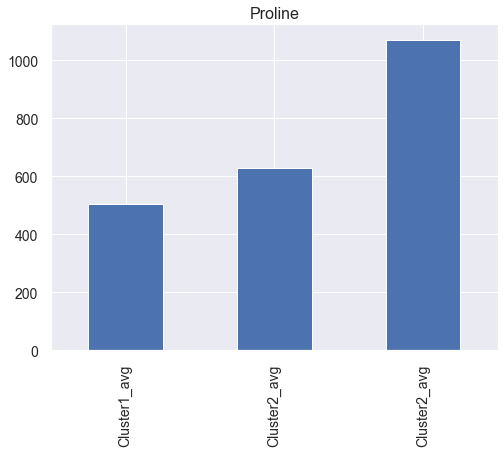

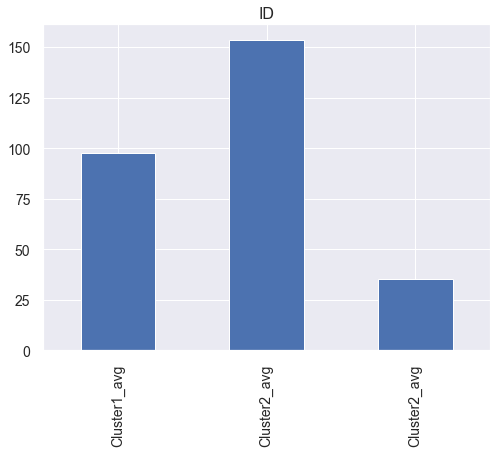

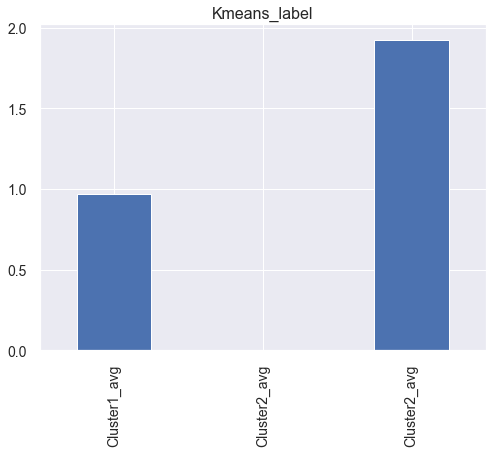

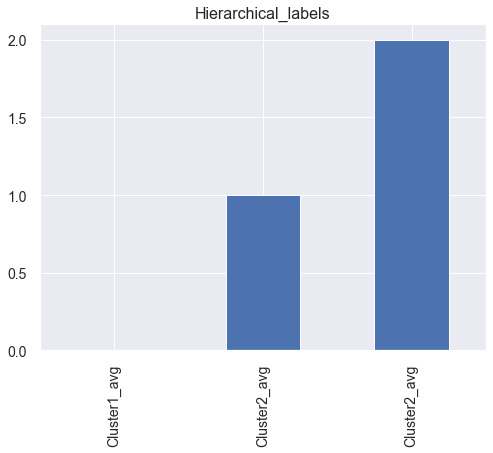

In [192]:
# Extract and plot one Column data .xs method
for i , row in avg_df.iterrows():
    fig = plt.subplots(figsize=(8,6))
    j = avg_df.xs(i ,axis = 0)
    plt.title(i, fontsize=16, fontweight=20)
    j.plot(kind='bar',fontsize=14)
    plt.show()
    print()

### Comparing Hierarchical Clusters with the Original Classified Dataset using "Type" Feature

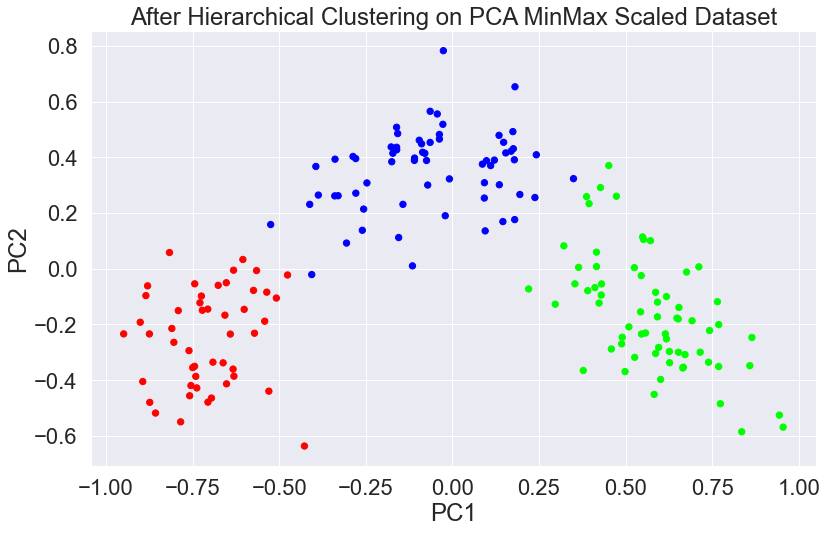

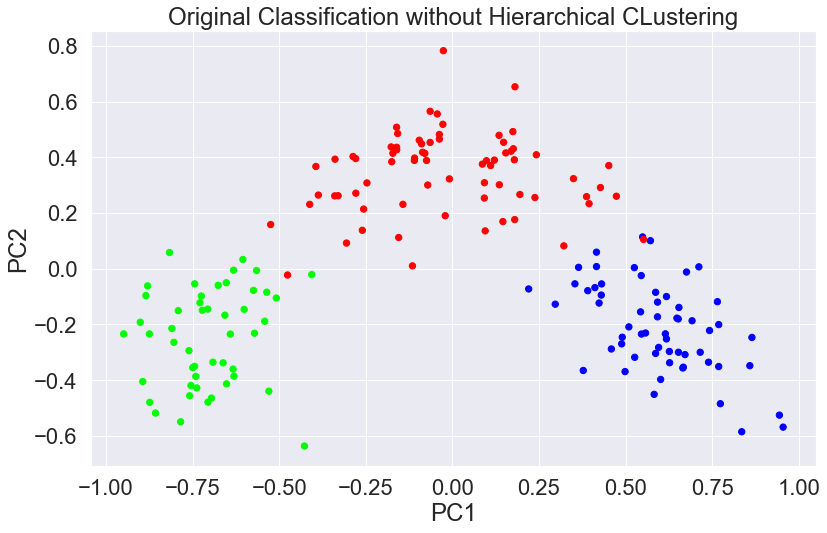

In [196]:
# Scatterplot
plt.scatter(pca_minmax_df.iloc[:,0], pca_minmax_df.iloc[:,1], c=df['Hierarchical_labels'], cmap="brg", s=40)

# Aesthetics
plt.title('After Hierarchical Clustering on PCA MinMax Scaled Dataset')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Scatterplot
plt.scatter(pca_minmax_df.iloc[:,0], pca_minmax_df.iloc[:,1], c=data['Type'], cmap="brg", s=40)

# Aesthetics
plt.title('Original Classification without Hierarchical CLustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [197]:
# Group data by Clusters (K=3)
display('After Applying Hierarchical CLustering on  PCA MinMax Scaled Dataset',df.groupby('Hierarchical_labels').agg(['mean']),'Original Classified Dataset',data.groupby('Type').agg(['mean']))

'After Applying Hierarchical CLustering on  PCA MinMax Scaled Dataset'

Alcohol     Malic       Ash Alcalinity   Magnesium  \
                          mean      mean      mean       mean        mean   
Hierarchical_labels                                                         
0                    12.226094  1.964219  2.244531  20.076563  93.890625    
1                    13.157708  3.386042  2.437083  21.510417  98.541667    
2                    13.637424  1.933788  2.433485  17.465152  106.287879   

                      Phenols Flavanoids Nonflavanoids Proanthocyanins  \
                         mean       mean          mean            mean   
Hierarchical_labels                                                      
0                    2.157969  1.987656   0.372812      1.565781         
1                    1.681667  0.788542   0.455833      1.167708         
2                    2.874242  2.971970   0.282879      1.923030         

                        Color       Hue  Dilution      Proline          ID  \
                         mean      mean      mean         mean        mean   
Hierarchical_labels                                                          
0                    2.994687  1.042437  2.746875  503.125000   97.578125    
1                    7.410833  0.684375  1.698542  627.500000   153.520833   
2                    5.347879  1.073636  3.144697  1070.106061  35.106061    

                    Kmeans_label  
                            mean  
Hierarchical_labels               
0                    0.968750     
1                    0.000000     
2                    1.939394

'Original Classified Dataset'

Alcohol     Malic       Ash Alcalinity   Magnesium   Phenols  \
           mean      mean      mean       mean        mean      mean   
Type                                                                   
1     13.744746  2.010678  2.455593  17.037288  106.338983  2.840169   
2     12.278732  1.932676  2.244789  20.238028  94.549296   2.258873   
3     13.153750  3.333750  2.437083  21.416667  99.312500   1.678750   

     Flavanoids Nonflavanoids Proanthocyanins     Color       Hue  Dilution  \
           mean          mean            mean      mean      mean      mean   
Type                                                                          
1     2.982373   0.290000      1.899322        5.528305  1.062034  3.157797   
2     2.080845   0.363662      1.630282        3.086620  1.056282  2.785352   
3     0.781458   0.447500      1.153542        7.396250  0.682708  1.683542   

          Proline     ID Kmeans_label  
             mean   mean         mean  
Type                                   
1     1115.711864  30.0   2.0          
2     519.507042   95.0   1.0          
3     629.895833   154.5  0.0